# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.interpolate import interp1d
from scipy.optimize import fsolve
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading the Data

In [182]:
df = pd.read_csv('/content/drive/MyDrive/dataset/leadScore/Leads.csv')

# Understanding Dataset

In [183]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [184]:
df.shape

(9240, 37)

In [185]:
# checking number of unique values in each column
df.nunique()

,0
Prospect ID,9240
Lead Number,9240
Lead Origin,5
Lead Source,21
Do Not Email,2
Do Not Call,2
Converted,2
TotalVisits,41
Total Time Spent on Website,1731
Page Views Per Visit,114


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [187]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


In [188]:
#Checking for count of missing values in each column
df.isnull().sum()

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,36
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,137
Total Time Spent on Website,0
Page Views Per Visit,137


In [189]:
# Checking for duplicate rows in our dataset
df['Lead Number'].nunique()

9240

# Data cleanup
*   As mentioned in the problem statement, many categorical variables contain a level called 'Select,' which needs to be addressed, as it essentially represents a missing value. This likely occurs because the customer did not choose any option from the list, leaving the data in these columns as the default value 'Select.'



In [190]:
# Converting 'Select' values to NaN.
df = df.replace('Select', np.nan)

In [191]:
# Checking if all 'Select' values have been handled in the columns
cols_with_select_value = [col for col in df.columns if len(df[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

[]


# Handling missing values

In [192]:
# Calculating Missing Values Percentage

100*(df.isna().mean()).sort_values(ascending=False)

,0
How did you hear about X Education,78.463203
Lead Profile,74.188312
Lead Quality,51.590909
Asymmetrique Profile Score,45.649351
Asymmetrique Activity Score,45.649351
Asymmetrique Activity Index,45.649351
Asymmetrique Profile Index,45.649351
City,39.707792
Specialization,36.580087
Tags,36.287879


In [193]:
# Function to drop columns with a certain percentage of missing values and display the shape before and after dropping
def dropNullColumns(data, percentage=40):
    """
    Drops columns from the DataFrame that have missing values exceeding the given percentage
    and displays the shape of the DataFrame before and after dropping the columns.

    Parameters:
    data (DataFrame): The input DataFrame.
    percentage (int, optional): The percentage threshold for missing values to drop a column. Default is 40.
    """

    # Calculate the percentage of missing values for each column
    missing_perc = 100 * data.isna().mean().sort_values(ascending=False)

    # Identify columns where the missing percentage exceeds the threshold
    col_to_drop = missing_perc[missing_perc >= percentage].index.to_list()

    # Display information about columns being dropped
    print(f"Total columns dropped: {len(col_to_drop)}")
    print(f"List of columns dropped: {col_to_drop}\n")

    # Show the shape of the data before dropping columns
    print(f"Shape before dropping columns: {data.shape}")

    # Drop the identified columns in place
    data.drop(labels=col_to_drop, axis=1, inplace=True)

    # Show the shape of the data after dropping columns
    print(f"Shape after dropping columns: {data.shape}")


In [194]:
dropNullColumns(df)

Total columns dropped: 7
List of columns dropped: ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index']

Shape before dropping columns: (9240, 37)
Shape after dropping columns: (9240, 30)


In [195]:
# Checking the percentage of null values for remaining columns

100*(df.isna().mean()).sort_values(ascending=False)

,0
City,39.707792
Specialization,36.580087
Tags,36.287879
What matters most to you in choosing a course,29.318182
What is your current occupation,29.112554
Country,26.634199
Page Views Per Visit,1.482684
TotalVisits,1.482684
Last Activity,1.114719
Lead Source,0.389610


Categorical data

In [196]:
# Select the columns with non-numeric data type
categorical_cols = df.select_dtypes(include=['category', 'object']).columns.tolist()

# Print the selected columns
print(categorical_cols)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [197]:
# List of columns to analyze value counts percentages for
columnsList = [
    "City", "Specialization", "Tags", "What matters most to you in choosing a course",
    "What is your current occupation", "Country", "Last Activity", "Lead Source"
]

# Loop through each column in the list and print value counts as percentages
for col in columnsList:
    # Calculate the percentage of each unique value in the column
    perc = 100 * df[col].value_counts(normalize=True)

    # Print the results for the current column
    print(f"value_counts % for: {col}\n")
    print(perc, "\n")
    print("___" * 40, "\n")  # Divider for better readability

value_counts % for: City

City
Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: proportion, dtype: float64 

________________________________________________________________________________________________________________________ 

value_counts % for: Specialization

Specialization
Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.0375

### Findings
**<span style="color:darkgreen">City:</span>** The City column has 39.71% missing values. Imputing these with 'Mumbai' would increase data skewness, potentially leading to bias in the model. Therefore, it's better to drop the City column.

**<span style="color:darkgreen">Specialization:</span>** With 36.58% missing values, Specialization is fairly evenly distributed across different options. Dropping or imputing values may not be ideal, so it's best to create an additional category labeled 'Others.'

**<span style="color:darkgreen">Tags:</span>** The Tags column has 36.29% missing values. Since Tags represent the current status of the lead, they are not relevant for modeling and can be dropped.

**<span style="color:darkgreen">What matters most to you in choosing a course:</span>** This variable has 29.32% missing values, with 99.95% of customers selecting 'better career prospects.' The overwhelming skew makes this variable uninformative, so it offers little insight.

**<span style="color:darkgreen">What is your current occupation:</span>** The missing values can be imputed with 'Unemployed,' as it is the most common occupation. This variable is important in a business context, as X Education sells online courses, and unemployed individuals are likely to enroll to improve their employment prospects.

**<span style="color:darkgreen">Country:</span>** Since 96% of the customers are from India, imputing missing values with 'India' does not add much business value. As a result, the Country column can be dropped.

**<span style="color:darkgreen">Last Activity:</span>** "Email Opened" is the most frequent value, and the column has only 1.11% missing data. Thus, imputing missing values with 'Email Opened' is a reasonable approach.

**<span style="color:darkgreen">Lead Source:</span>** "Google" appears most frequently, and the column has only 0.39% missing values. Therefore, it's appropriate to impute the missing values with 'Google.'


---

### Dropping
'City', 'Tags', 'country', 'What matters most to you in choosing a course'

In [198]:
# Dropping Columns
print("Before Drop",df.shape)
df.drop(['City','Tags','Country','What matters most to you in choosing a course'],axis=1,inplace=True)
print("After Drop",df.shape)

Before Drop (9240, 30)
After Drop (9240, 26)


### Imputing the following columns
'Specialization', 'Lead Source', 'Last Activity', 'What is your current occupation'

In [199]:
# Imputing values as per the above observations/insights

missing_values={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}
df=df.fillna(value=missing_values)

In [200]:
# Re Checking the percentage of null values for remaining columns

round(((df.isnull().sum()/df.shape[0])*100),2).sort_values(ascending=False)

,0
TotalVisits,1.48
Page Views Per Visit,1.48
Prospect ID,0.00
Magazine,0.00
A free copy of Mastering The Interview,0.00
I agree to pay the amount through cheque,0.00
Get updates on DM Content,0.00
Update me on Supply Chain Content,0.00
Receive More Updates About Our Courses,0.00
Through Recommendations,0.00


## Numerical Data

In [201]:
df['TotalVisits'].value_counts().head()

,count
TotalVisits,
0.0,2189
2.0,1680
3.0,1306
4.0,1120
5.0,783


In [202]:
# TotalVisits missing values to be imputed with mode
df['TotalVisits'].fillna(df['TotalVisits'].mode()[0], inplace=True)

In [203]:
df['Page Views Per Visit'].value_counts().head(10)

,count
Page Views Per Visit,
0.0,2189
2.0,1795
3.0,1196
4.0,896
1.0,651
5.0,517
1.5,306
6.0,244
2.5,241


In [204]:
# Page Views Per Visit missing values to be imputed with mode

df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].mode()[0], inplace=True)

In [205]:
100*df['Last Notable Activity'].value_counts(normalize=True)

,proportion
Last Notable Activity,
Modified,36.872294
Email Opened,30.595238
SMS Sent,23.506494
Page Visited on Website,3.441558
Olark Chat Conversation,1.980519
Email Link Clicked,1.872294
Email Bounced,0.649351
Unsubscribed,0.508658
Unreachable,0.346320


In [206]:
#Checking columns with one unique value
df.describe(include = 'object')

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Search,Magazine,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,...,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,9240,5,21,2,2,17,19,6,2,1,...,2,2,2,2,1,1,1,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,No,No,Email Opened,Others,Unemployed,No,No,...,No,No,No,No,No,No,No,No,No,Modified
freq,1,4886,2904,8506,9238,3540,3380,8290,9226,9240,...,9239,9239,9236,9233,9240,9240,9240,9240,6352,3407


### Following columns have only one unique value:
* 'I agree to pay the amount through cheque', 'Get updates on DM Content', 'Update me on Supply Chain Content', 'Receive More Updates About Our Courses', 'Magazine'

### Dropping columns of no use for modeling

* 'Prospect ID', 'Lead Number', 'Last Notable Activity'
Above columns do not add any value to the model. Dropping these columns will remove unnecessary data from the dataframe.

In [207]:
cols_to_drop = ['Magazine', 'Receive More Updates About Our Courses',
                'Update me on Supply Chain Content', 'Get updates on DM Content',
                'I agree to pay the amount through cheque',
                'Prospect ID', 'Lead Number', 'Last Notable Activity']

print(f"Before Dropping Columns: {df.shape}")
df.drop(columns=cols_to_drop, inplace=True)
print(f"After Dropping Columns: {df.shape}")

Before Dropping Columns: (9240, 26)
After Dropping Columns: (9240, 18)


In [208]:
# get the percentage of missing values in each row

100*(df.isna().mean(axis=1)).sort_values(ascending=False).head(10)

,0
0,0.0
6064,0.0
6156,0.0
6157,0.0
6158,0.0
6159,0.0
6160,0.0
6161,0.0
6162,0.0
6163,0.0


### Checking & Dropping Category Columns that are Skewed

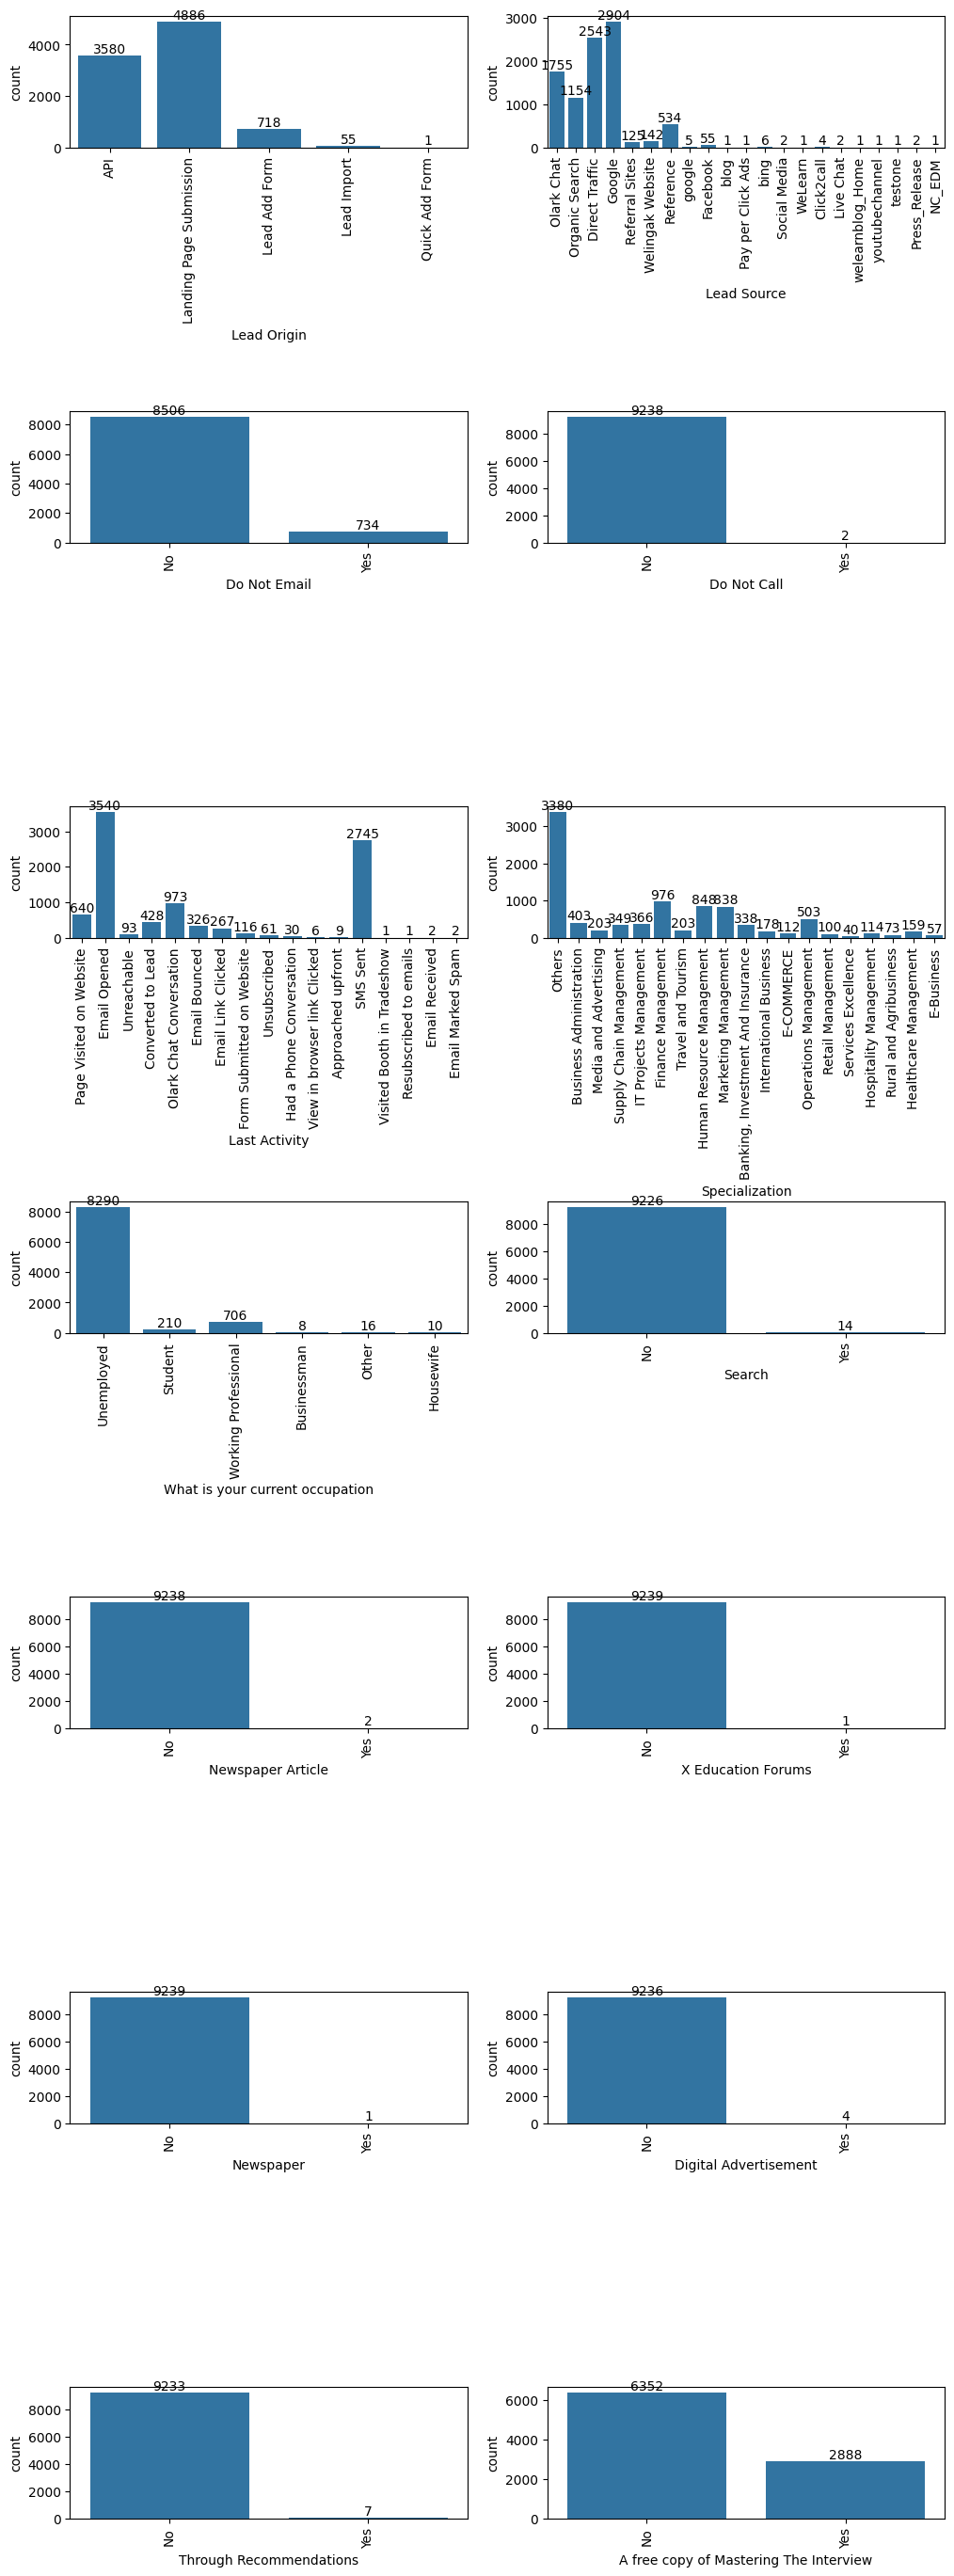

In [209]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Select categorical columns for plotting
categorical_col = df.select_dtypes(include=['category', 'object']).columns.tolist()

# Set figure size and layout adjustments
plt.figure(figsize=(12, 40))
plt.subplots_adjust(wspace=0.2, hspace=2)

# Loop through each categorical column and plot countplot
for idx, col in enumerate(categorical_col):
    plt.subplot(8, 2, idx + 1)  # Adjust the grid (8 rows, 2 columns)

    # Create countplot for each categorical column
    ax = sns.countplot(x=col, data=df)

    # Rotate x-axis labels for readability
    plt.xticks(rotation=90)

    # Annotate bars with count values
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5),
                    textcoords='offset points')

# Show the plot
plt.show()

Following columns have data which is highly skewed :

'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'.

Hence, these columns will be dropped as they will not add any value to the model. Morever, Skewed variables can affect the performance of logistic regression models, as they can 'lead to biased' or 'inaccurate parameter estimates'.

In [210]:
# Dropping categorical columns with highly skewed data
skewed_cols = ['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations']
print("Before Drop: ",df.shape)
df.drop(skewed_cols,axis=1,inplace=True)
print("After Drop: ",df.shape)

Before Drop:  (9240, 18)
After Drop:  (9240, 11)


# Checking & Dropping numerical  Columns with outliers

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

def Check_Outliers(data, columnList):

    # Set up the figure size and layout
    plt.figure(figsize=(22, 11))
    plt.subplots_adjust(wspace=0.4, hspace=0.5)

    # Loop through each column in columnList and create a boxplot
    for idx, col in enumerate(columnList):
        plt.subplot(2, 2, idx + 1)

        # Create a boxplot for the current column
        sns.boxplot(y=data[col])  # Set y-axis to the current column

        # Set the main title and specific title for each subplot
        plt.suptitle("Checking Outliers using Boxplot", fontsize=20, color="green")
        plt.ylabel(None)  # Remove y-axis label
        plt.title(col, fontsize=15, color='brown')

    # Display the plots
    plt.show()

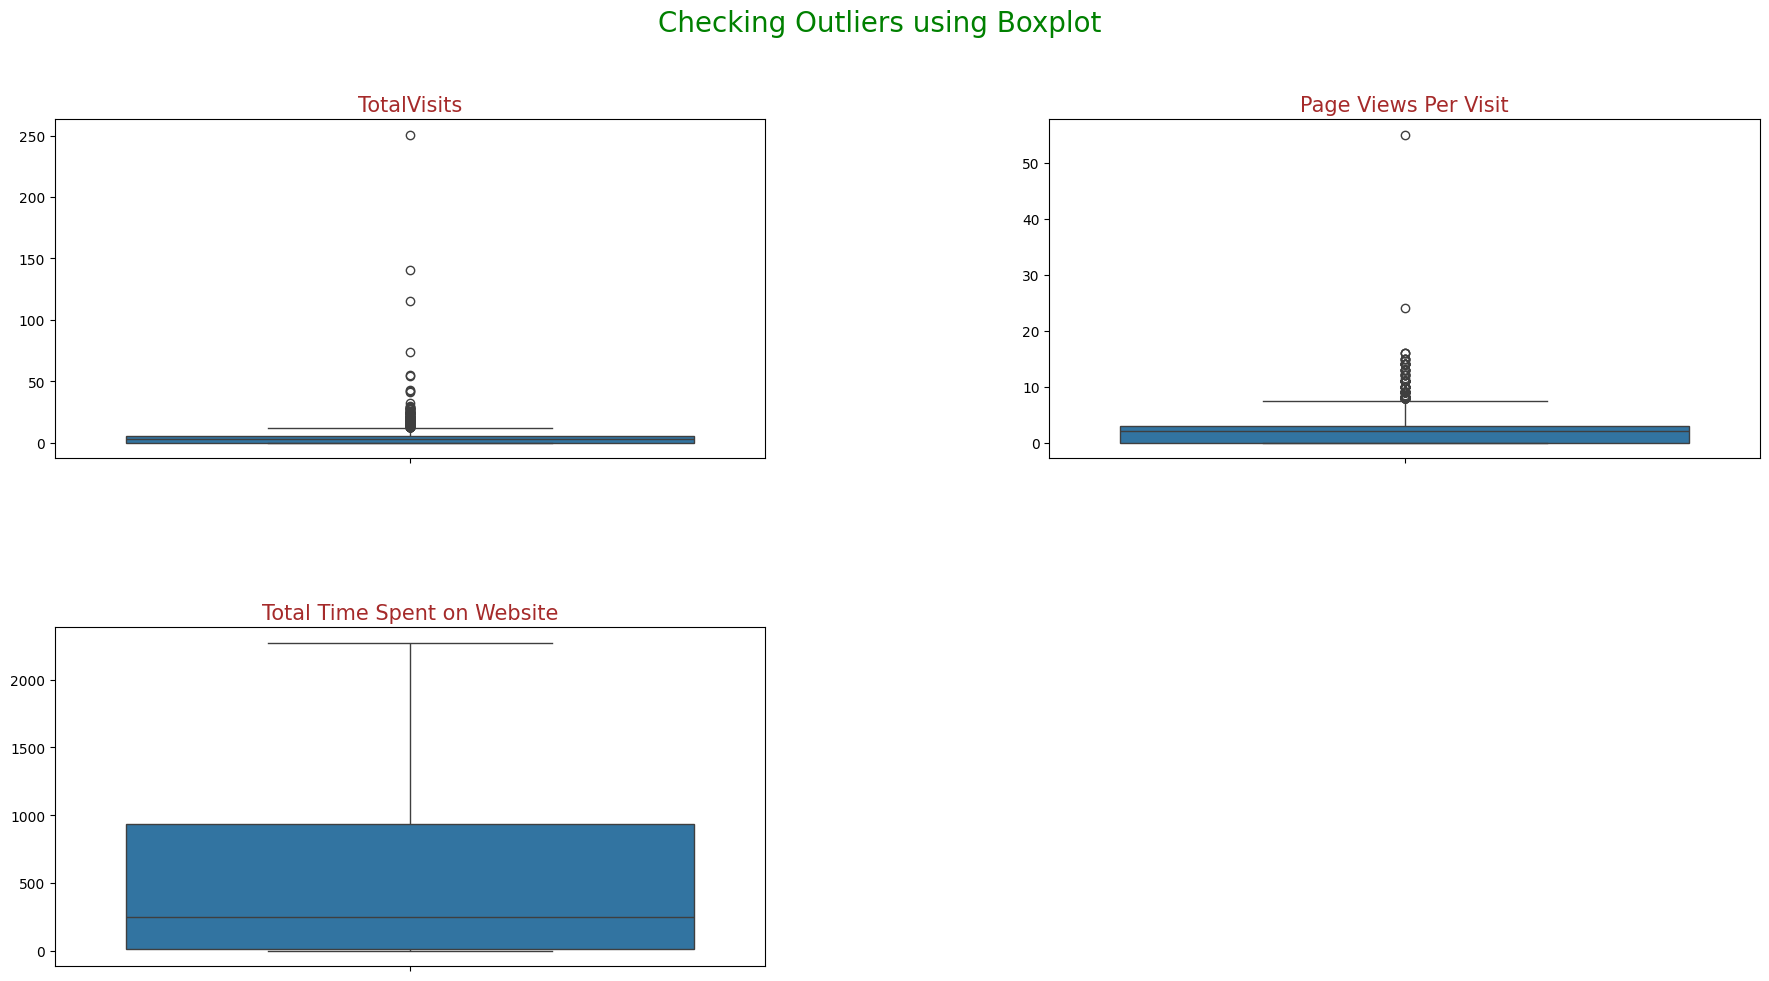

In [212]:
# Checking outliers for numerical variables other than target variable
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF
Check_Outliers(df, num_cols)

"TotalVisits","Page Views Per Visit", both these variables contain outliers as visible in the boxplot. So, These outliers needs to be treated for these variables

In [213]:
def Outlier_treatment(df, columnList):

    for col in columnList:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        IQR = q3 - q1

        # Calculate upper and lower bounds
        upper_bound = q3 + 1.5 * IQR
        lower_bound = q1 - 1.5 * IQR

        # Capping and flooring
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])  # Cap the upper bound
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])  # Floor the lower bound


In [214]:
# Checking outliers for numerical variables other than target variable
Outlier_treatment_cols = ["TotalVisits","Page Views Per Visit"]

# UDF
Outlier_treatment(df , Outlier_treatment_cols)

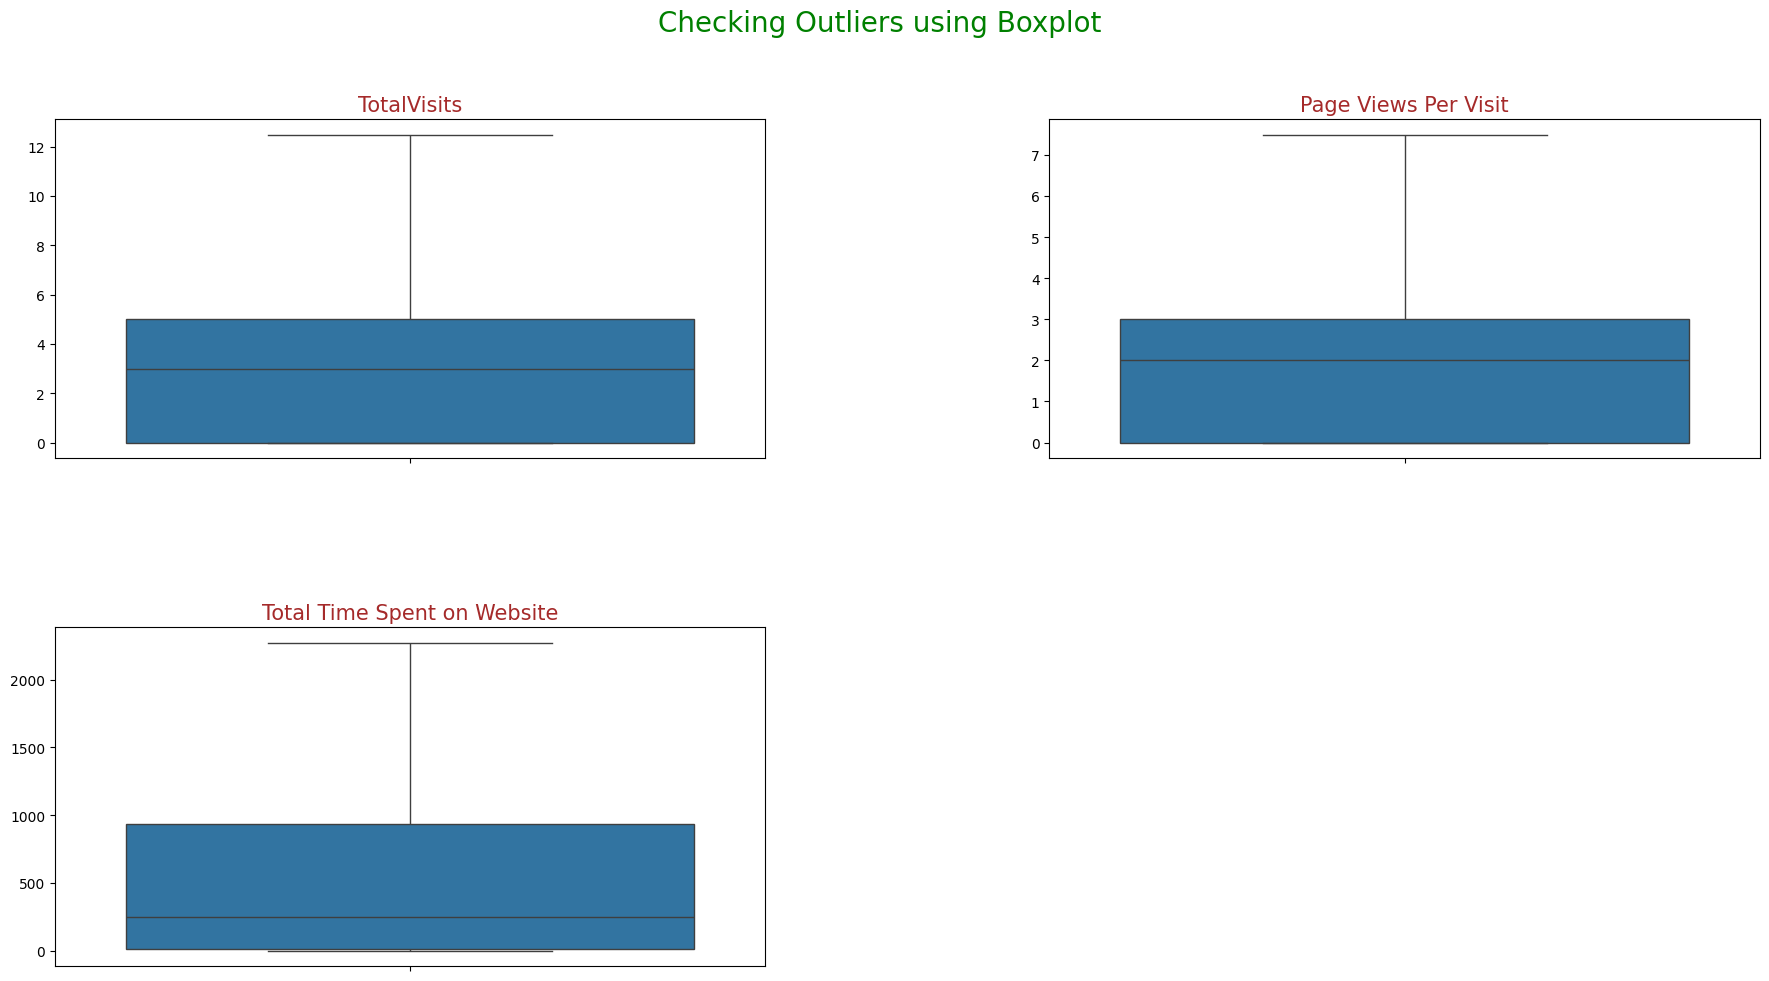

In [215]:
# Checking Boxplot after Outlier Treatment

num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF for boxplot
Check_Outliers(df, num_cols)

In [216]:
# List of categorical columns to analyze
columnsList_cat = [
    "Lead Origin",
    "Lead Source",
    "Do Not Email",
    "Last Activity",
    "Specialization",
    "What is your current occupation",
    "A free copy of Mastering The Interview"
]

# Calculate and print the percentage of value counts for each specified categorical column
for col in columnsList_cat:
    perc = 100 * df[col].value_counts(normalize=True)
    print(f"\nValue Counts % for: {col}\n")

    # Format and print percentages
    formatted_perc = perc.apply(lambda x: f"{x:.2f}%")
    print(formatted_perc)

    print("_" * 40)  # Separator for better readability



Value Counts % for: Lead Origin

Lead Origin
Landing Page Submission    52.88%
API                        38.74%
Lead Add Form               7.77%
Lead Import                 0.60%
Quick Add Form              0.01%
Name: proportion, dtype: object
________________________________________

Value Counts % for: Lead Source

Lead Source
Google               31.43%
Direct Traffic       27.52%
Olark Chat           18.99%
Organic Search       12.49%
Reference             5.78%
Welingak Website      1.54%
Referral Sites        1.35%
Facebook              0.60%
bing                  0.06%
google                0.05%
Click2call            0.04%
Press_Release         0.02%
Social Media          0.02%
Live Chat             0.02%
youtubechannel        0.01%
testone               0.01%
Pay per Click Ads     0.01%
welearnblog_Home      0.01%
WeLearn               0.01%
blog                  0.01%
NC_EDM                0.01%
Name: proportion, dtype: object
________________________________________

Val

We’ve observed that certain categories in the "Lead Score" and "Last Activity" columns have a limited number of records. To avoid creating an excessive number of unnecessary columns when generating dummy variables, we plan to consolidate these categories under the label "Others." This approach will help us maintain a cleaner and more organized dataset.

Additionally, we will standardize the case for "Google" and "google" in the "Lead Source" column to ensure consistency.

In [217]:
# Grouping low frequency value levels to Others
df['Lead Source'] = df['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

# Changing google to Google
df['Lead Source'] = df['Lead Source'].replace("google","Google")

In [218]:
# value_counts percentage after replace
df["Lead Source"].value_counts(normalize=True)*100

,proportion
Lead Source,
Google,31.482684
Direct Traffic,27.521645
Olark Chat,18.993506
Organic Search,12.489177
Reference,5.779221
Welingak Website,1.536797
Referral Sites,1.352814
Facebook,0.595238
Others,0.248918


In [219]:
# Grouping low frequency value levels to Others
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation',
                                                               'Approached upfront',
                                                               'View in browser link Clicked',
                                                               'Email Marked Spam',
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [220]:
# value_counts percentage after replace
df['Last Activity'].value_counts(normalize=True)*100

,proportion
Last Activity,
Email Opened,38.311688
SMS Sent,29.707792
Olark Chat Conversation,10.530303
Page Visited on Website,6.926407
Converted to Lead,4.632035
Email Bounced,3.528139
Email Link Clicked,2.889610
Others,2.218615
Form Submitted on Website,1.255411


### Binary Mapping categorical variables

In [221]:
# Mapping binary categorical variables (Yes/No to 1/0)
df['Do Not Email'] = df['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].apply(lambda x: 1 if x =='Yes' else 0)

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   int6

### Data Analysis (EDA)

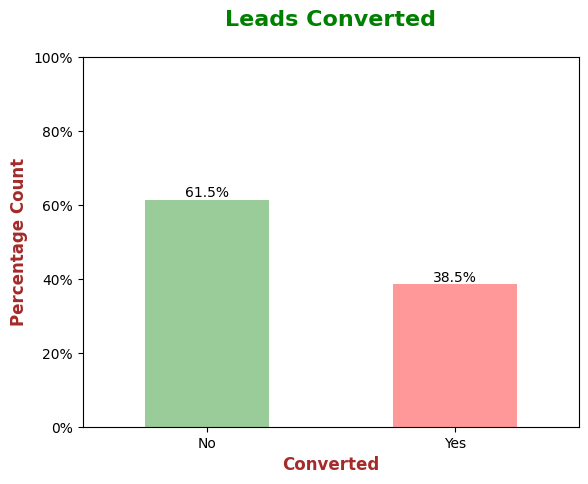

In [223]:
# Plotting the conversion results
ax = (100 * df["Converted"].value_counts(normalize=True)).plot.bar(color=["Green", "Red"], alpha=0.4)

# Adding and formatting title
plt.title("Leads Converted\n", fontsize=16, fontweight='bold', color='green')

# Labeling axes
plt.xlabel('Converted', fontsize=12, fontweight='bold', color='brown')
plt.ylabel("Percentage Count", fontsize=12, fontweight='bold', color='brown')

# Modifying ticks on the y-axis
ticks = np.arange(0, 101, 20)
plt.yticks(ticks, ["{:.0f}%".format(i) for i in ticks])

# Setting x-ticks
plt.xticks([0, 1], ["No", "Yes"], rotation=0)

# Annotating the bars with percentages
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

* Conversion rate is of 38.5%, meaning only 38.5% of the people have converted to leads.(Minority)
* While 61.5% of the people didnt convert to leads. (Majority)

## Univariate Analysis

### Categorical Variables

In [224]:
#List of categorical columns
cat_cols = ["Lead Origin","What is your current occupation","Do Not Email",
            "A free copy of Mastering The Interview","Lead Source","Last Activity","Specialization"]

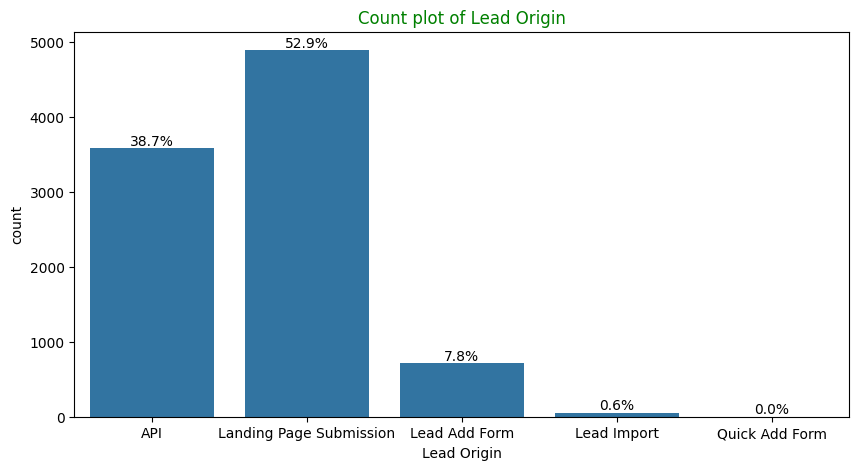

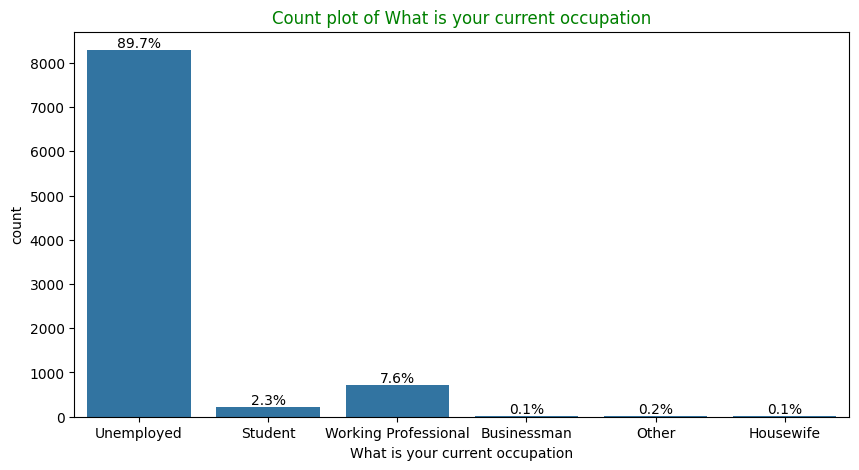

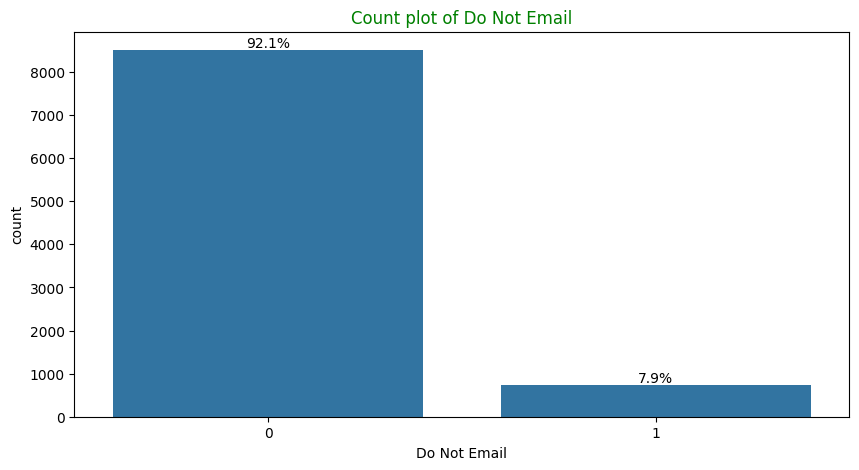

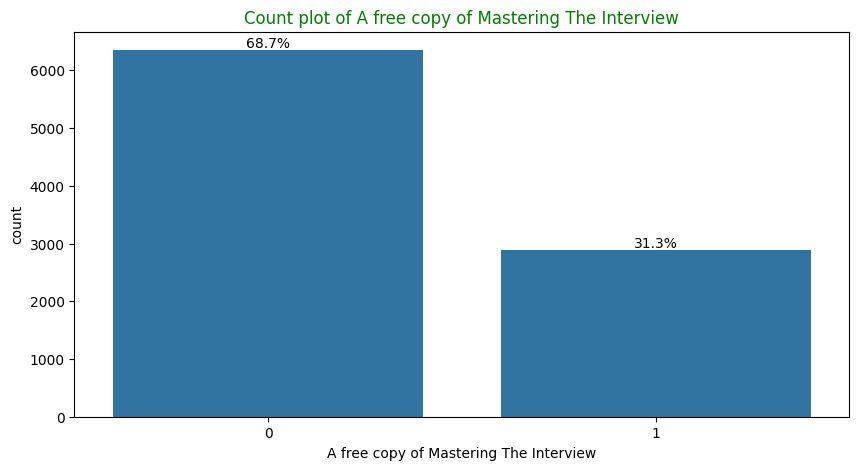

In [225]:
# countplot of columns with its value_counts percentage as annotation
for i in cat_cols[:4]:

    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df)
    total=len(df[i])
    plt.xticks(rotation=0)

    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


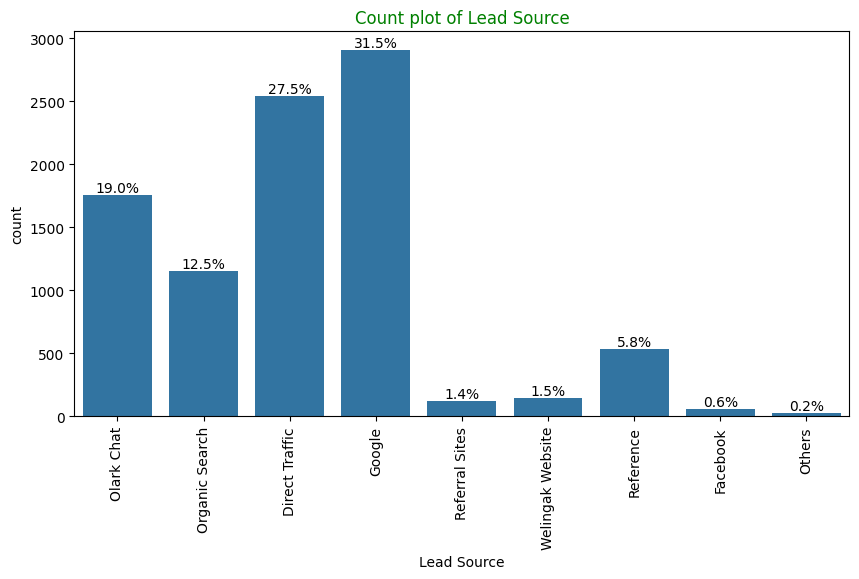

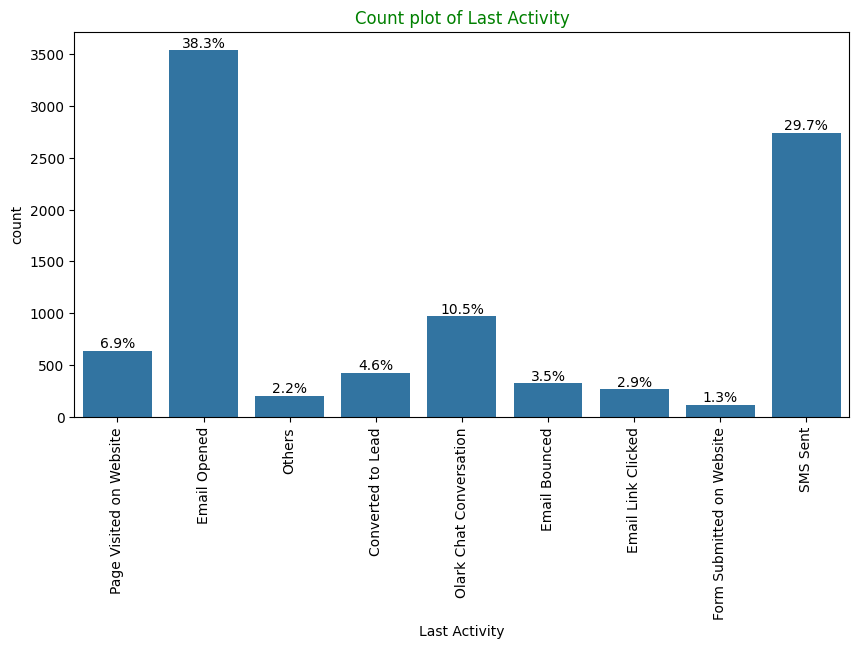

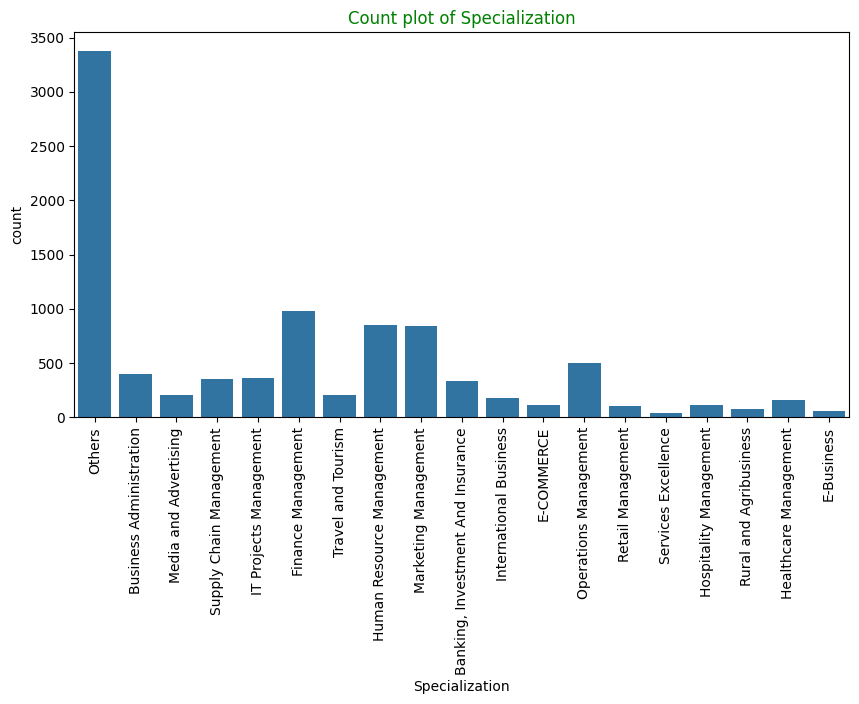

In [226]:
# Barplot for remaining columns from cat_cols (Did separate to rotate xticks 90* so labels doesnt become messy)
for i in cat_cols[4:]:

    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df)
    total=len(df[i])
    plt.xticks(rotation=90)


    if i!="Specialization":        # (not doing for Specialization xtick labels will be messy)
        for p in ax.patches:
            text = '{:.1f}%'.format(100*p.get_height()/total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()

            ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    else:
        pass

## Insights from Univariate Analysis:
Below are the key features where the majority of customers fall (both Converted and Not Converted):

* Lead Origin: 53% of the customers came through "Landing Page Submission," while 39% were identified via "API."
* Current Occupation: 90% of the customers are categorized as Unemployed.
Do Not Email: 92% of customers have opted out of receiving course-related emails.
* Lead Source: 58% of leads come from a combination of "Google" and "Direct Traffic."
* Last Activity: 68% of customer interactions involve "SMS Sent" and "Email Opened."

These insights will be valuable for conducting Bivariate Analysis.

## Bivariate Analysis

In [227]:
def Bivariate_cat(df, variable_name, Target="Converted"):
    """
    Creates a two-part visualization:
    1) Distribution of categories in the selected variable with count plot.
    2) Lead conversion rate (percentage) for the variable.

    Parameters:
    df : pandas.DataFrame : The dataset to use.
    variable_name : str : Name of the categorical variable to analyze.
    Target : str : The target variable for conversion rate comparison. Default is 'Converted'.
    """
    plt.figure(figsize=(20, 6))
    plt.suptitle(f"{variable_name} Countplot vs Lead Conversion Rates", color="Brown", fontsize=18)

    # Plot 1: Distribution of the variable
    plt.subplot(1, 2, 1)
    plt.title(f"Distribution of {variable_name}", color="blue")
    ax = sns.countplot(x=variable_name, hue=Target, data=df, palette="muted", alpha=0.46)

    total = len(df[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No", "Yes"], title="Converted")

    # Annotation for Plot 1 (Percentage distribution)
    for p in ax.patches:
        percentage = 100 * p.get_height() / total
        ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    # Plot 2: Lead Conversion Rate
    plt.subplot(1, 2, 2)
    plt.title(f"Lead Conversion Rate for {variable_name}", color="green", fontsize=12)
    ax = sns.countplot(x=variable_name, hue=Target, data=df, palette="cubehelix", alpha=0.85)

    # Modifications for readability
    plt.xticks(rotation=90)
    plt.ylabel("Count", color='brown')
    plt.xlabel(f"{variable_name}")
    plt.legend(labels=["Not Converted", "Converted"], title="Lead Conversion Rate")

    # Annotation for Plot 2 (Lead conversion rate)
    for bars in ax.containers:
        total = sum(p.get_height() for p in bars)
        for p in bars:
            if total > 0:
                percentage = 100 * p.get_height() / total
                ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='bottom')

    plt.show()


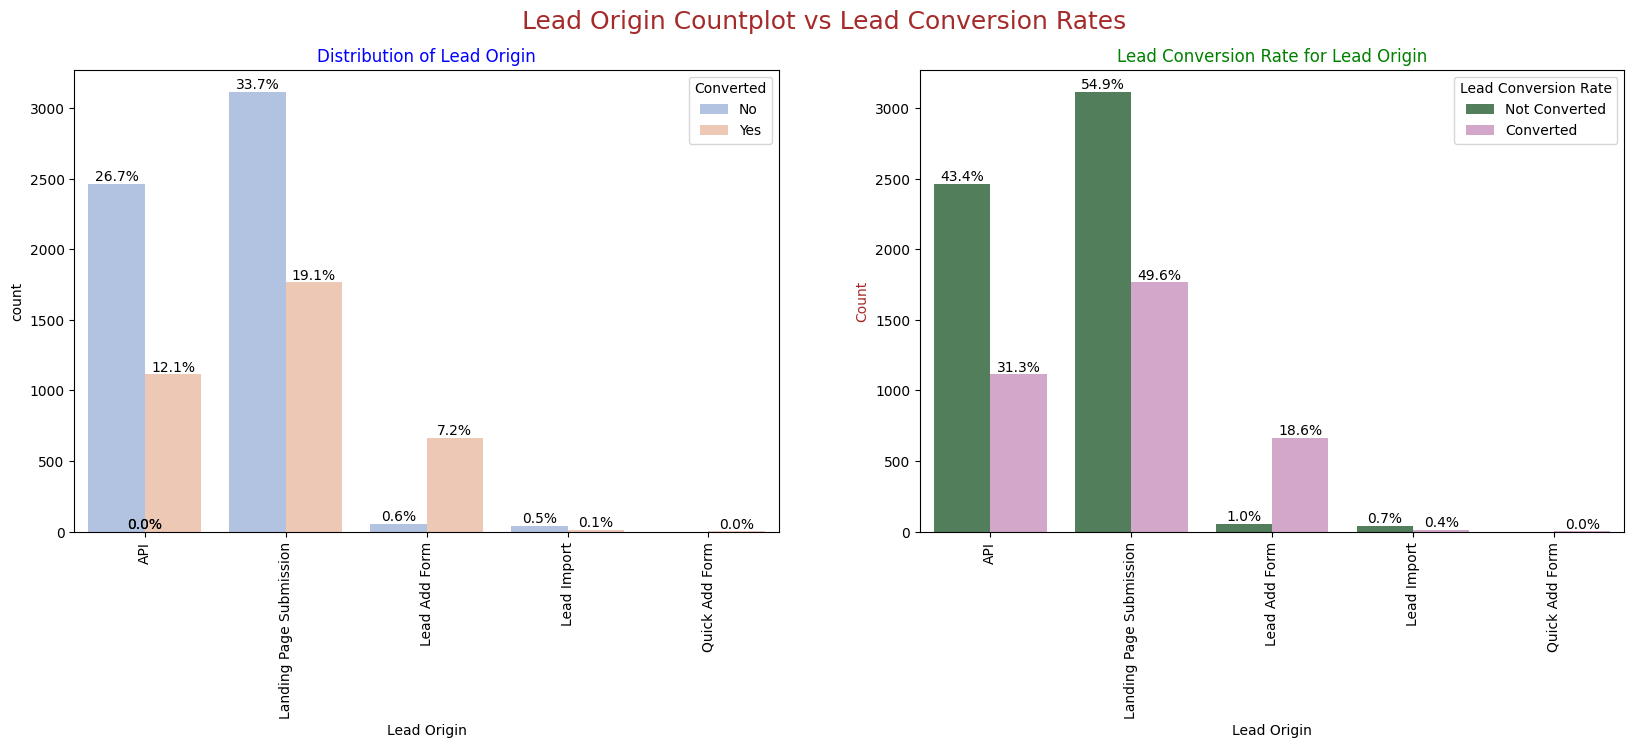

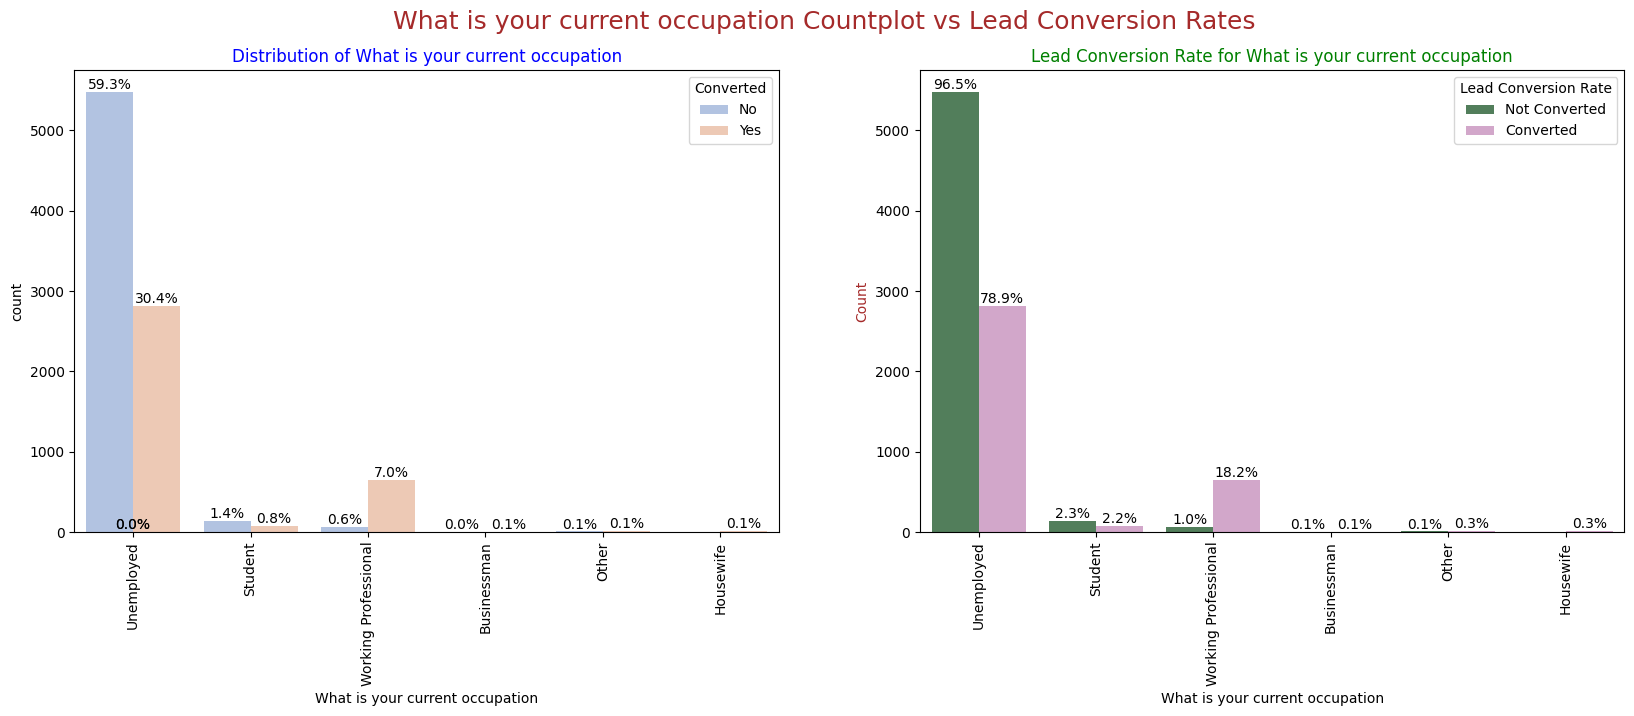

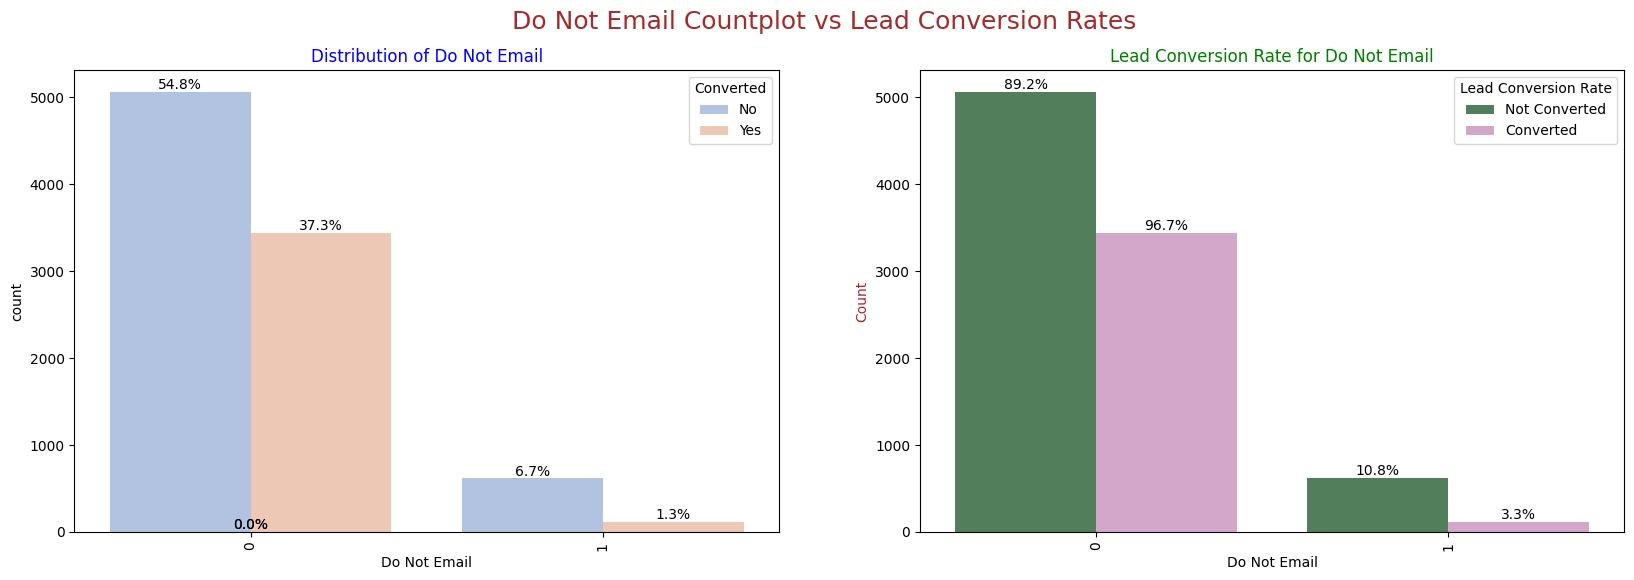

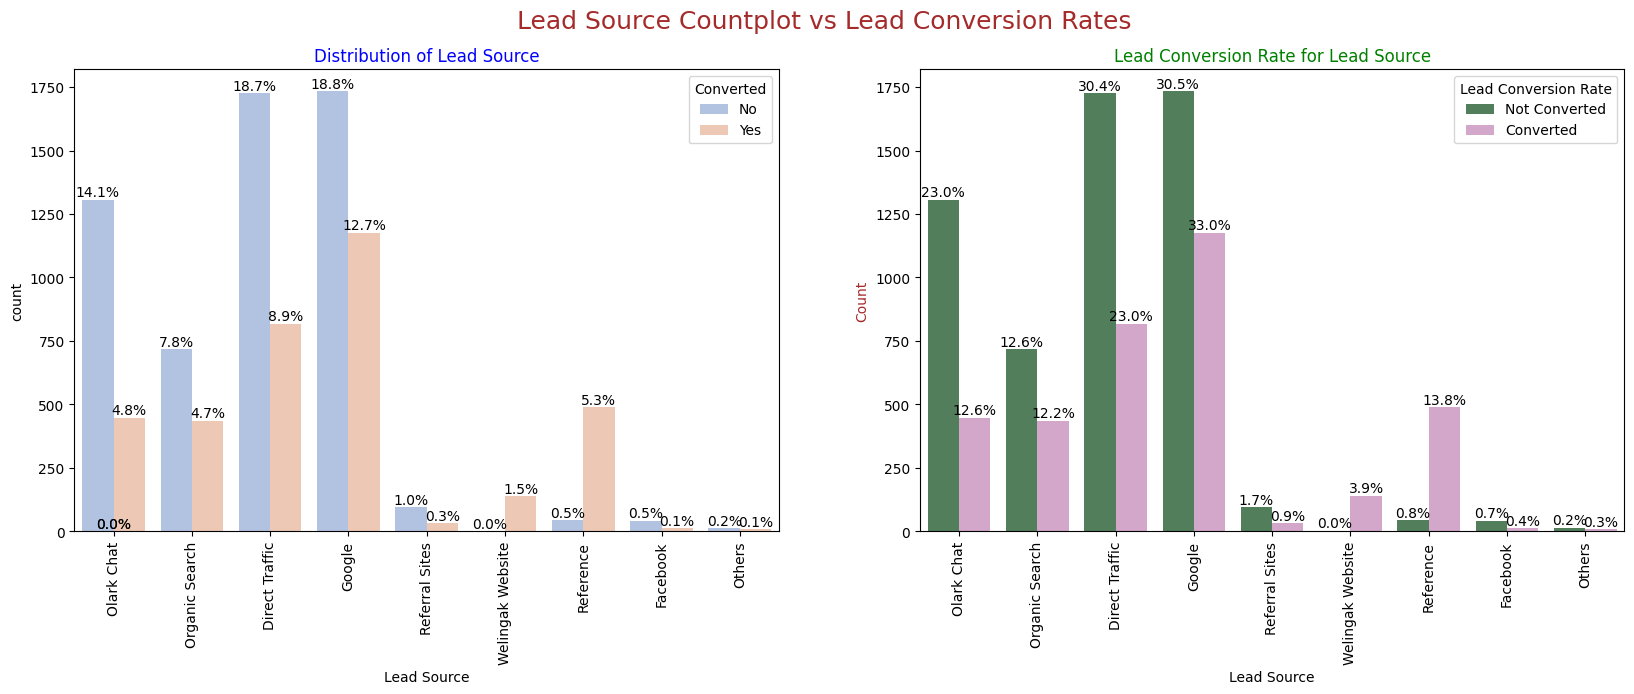

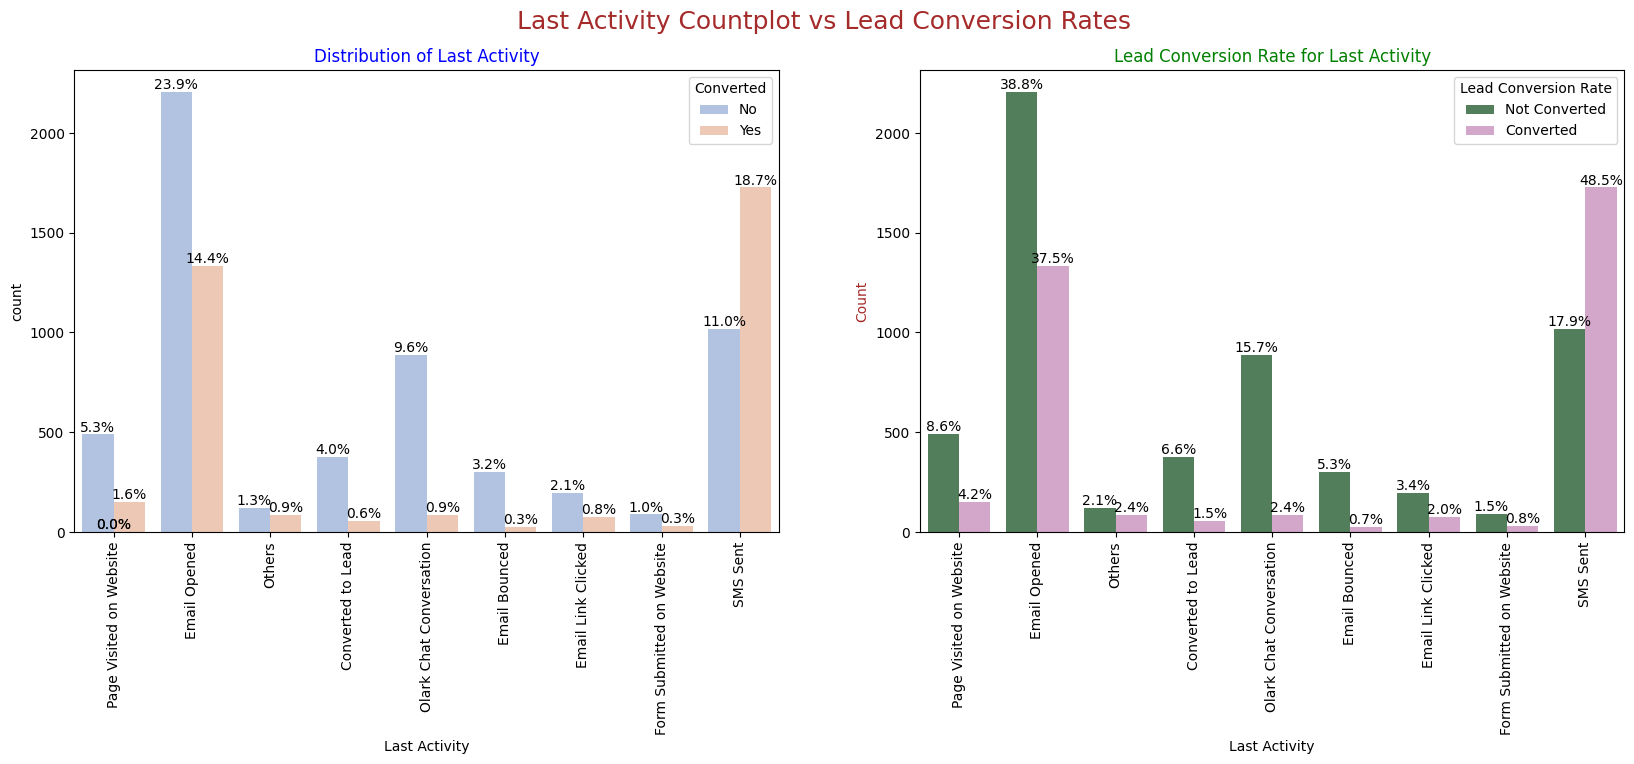

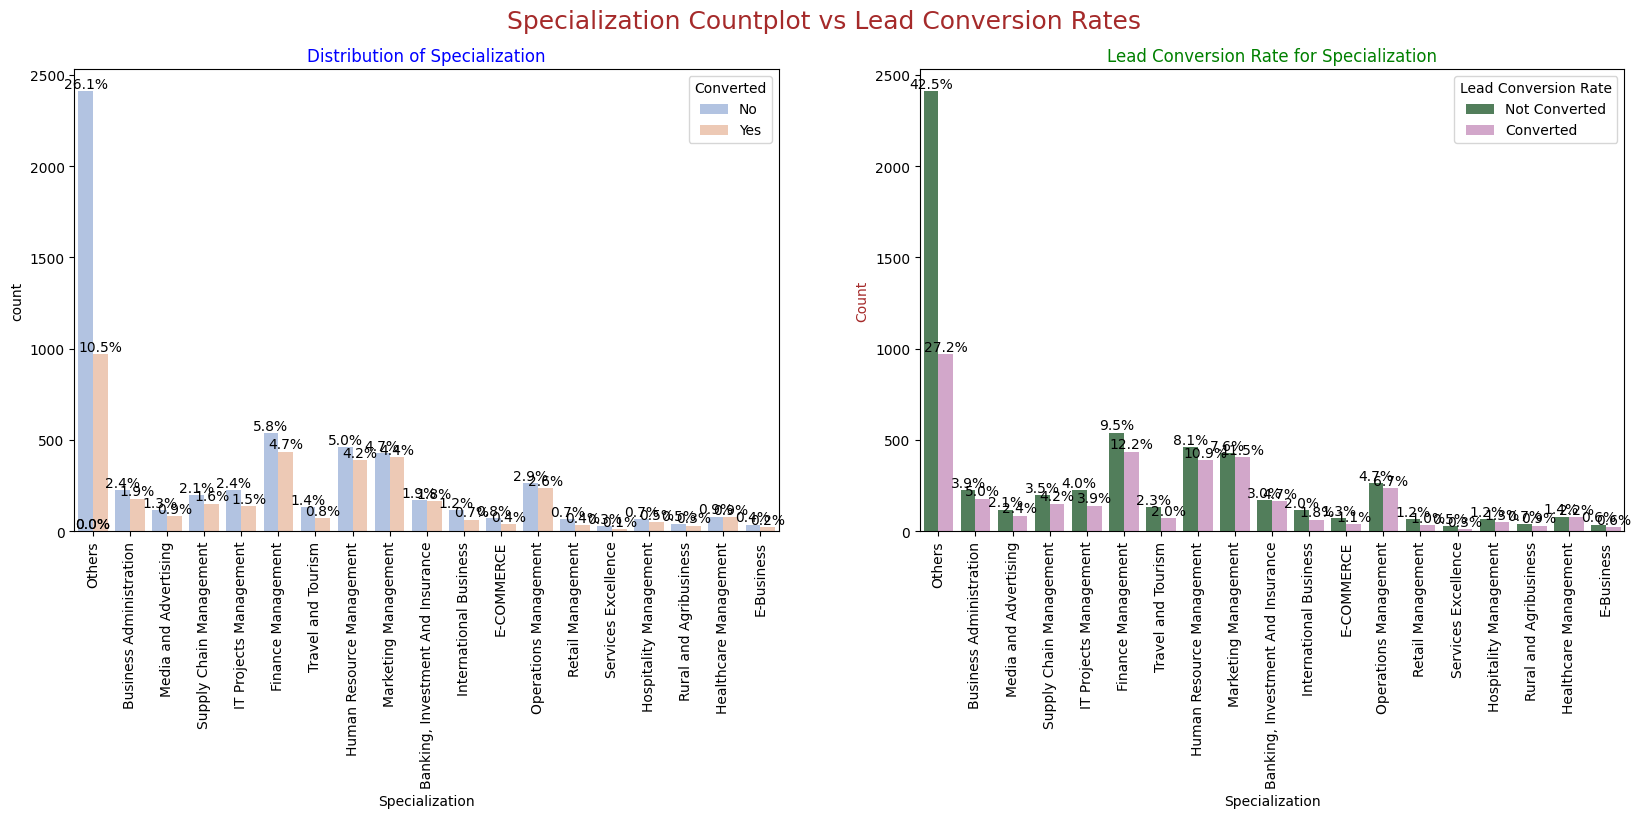

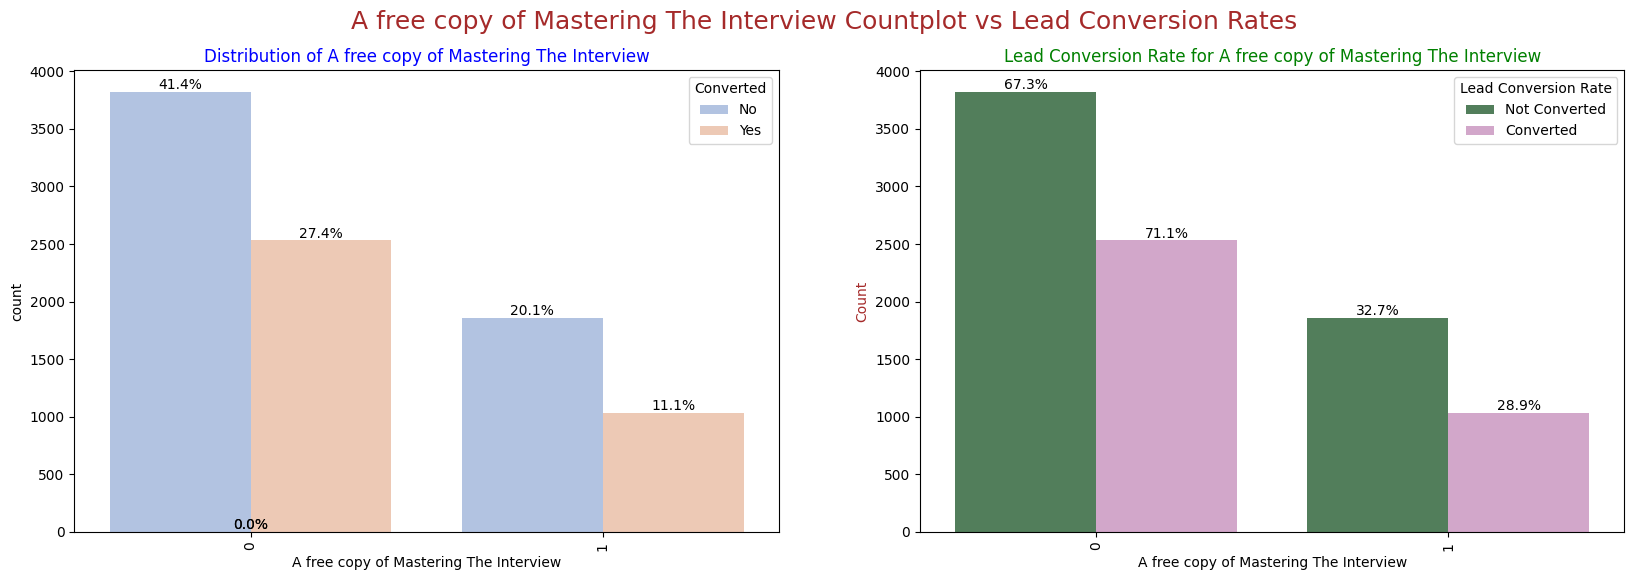

In [228]:
# Bivariate Analysis for all these variables using loop and UDF
# Comparision between variables w.r.t. 'Converted' (Target variable) , taking one categorical column w.r.t target variable as 'hue'
cat_cols = ["Lead Origin","What is your current occupation","Do Not Email",
            "Lead Source","Last Activity","Specialization","A free copy of Mastering The Interview"]

for i in cat_cols:
    Bivariate_cat(df,variable_name=i)

Here's a concise summary of the key insights for each variable:

>Lead Origin:
* Landing Page Submission accounts for 52% of leads with a 36% Lead Conversion Rate (LCR).
* API contributes 39% of leads with a 31% LCR.

>Current Occupation:
* 90% of customers are Unemployed with a 34% LCR.
* Working Professionals make up 7.6% of customers but have a very high 92% LCR.

>Do Not Email:
* 92% of people opted out of email communications.

>Lead Source:
* Google has a 40% LCR, contributing 31% of leads.
* Direct Traffic: 32% LCR, 27% of leads.
* Organic Search: 37.8% LCR, 12.5% of leads.
* Reference: Highest LCR of 91%, but only 6% of leads come from this source.

>Last Activity:
* SMS Sent has a 63% LCR, contributing 30% of last activities.
* Email Opened: 38% of last activities, with a 37% LCR.

>Specialization:
* Marketing, HR, and Finance Management show good contribution to lead conversions.

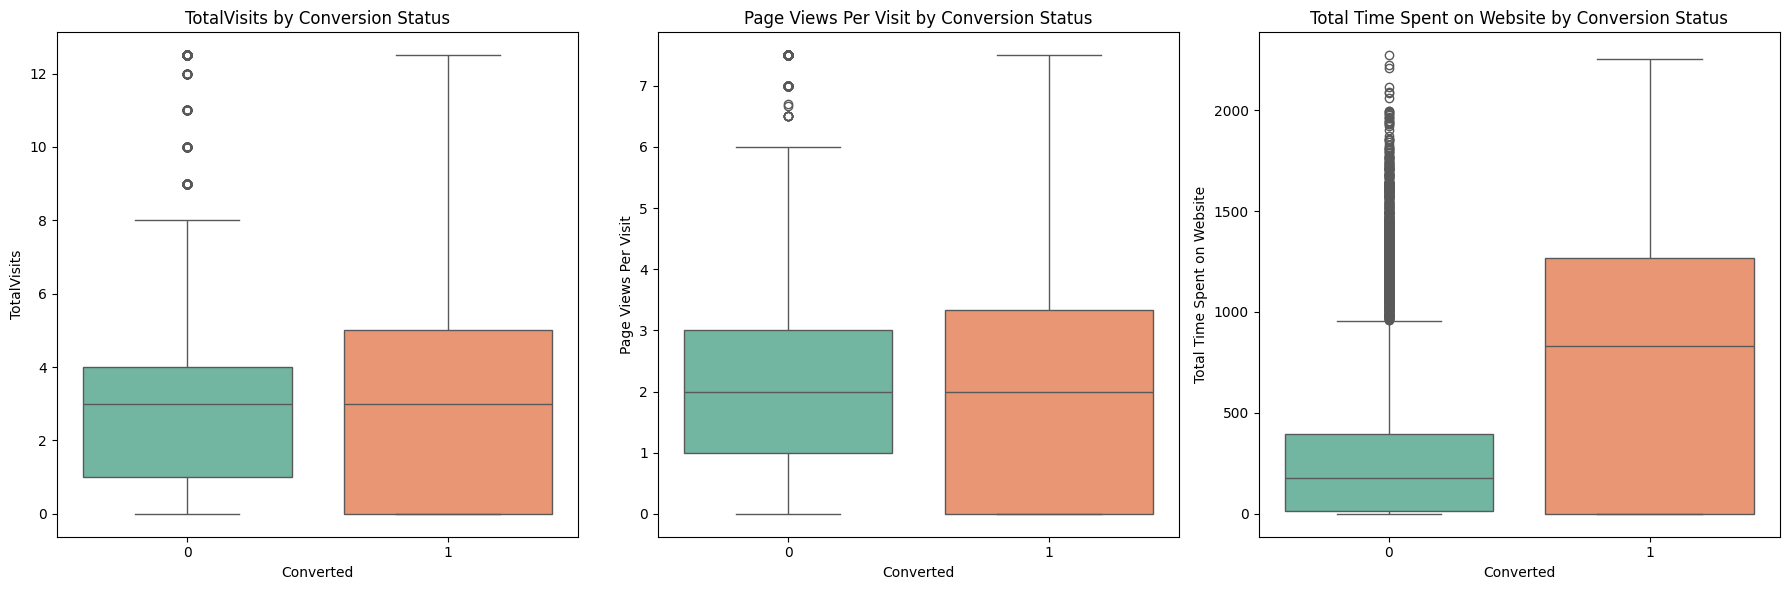

In [229]:
# List of columns to plot
columns = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

# Create a figure and adjust the size
plt.figure(figsize=(18, 6))

# Loop over the columns and create a boxplot for each
for i, col in enumerate(columns):
    plt.subplot(1, len(columns), i+1)  # Adjust the number of subplots dynamically
    sns.boxplot(y=col, x='Converted', data = df, palette="Set2")
    plt.title(f"{col} by Conversion Status")
    plt.ylabel(col)
    plt.xlabel("Converted")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

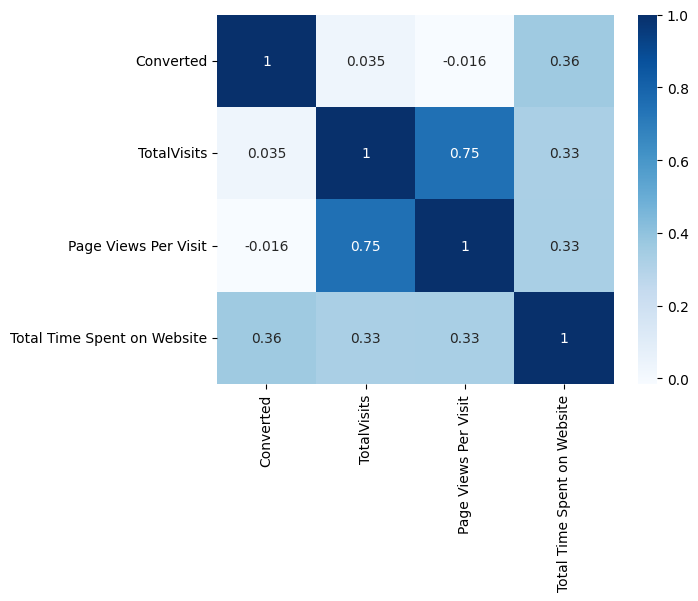

In [230]:
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
# Heatmap to show correlation between numerical variables
sns.heatmap(data=df[num_cols].corr(),cmap="Blues",annot=True)
plt.show()

### Data preparation


*   For categorical variables with multiple levels, create dummy features (one-hot encoded)



In [231]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df[["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation"]], drop_first=True, dtype = int)

# Adding the results to the master dataframe
df = pd.concat([df, dummy], axis=1)

In [232]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,...,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0


In [233]:
# Dropping columns
df = df.drop(["Lead Origin", "Lead Source", "Last Activity", "Specialization", "What is your current occupation"], axis=1)

In [234]:
df.shape

(9240, 49)

### Test-Train Split

In [235]:
# Putting predictor variables to X
X = df.drop('Converted', axis=1)

# Putting Target variables to y
y = df["Converted"]

In [236]:
# Splitting the data into train and test with 7:3 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [237]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_train: (6468, 48) 
y_train: (6468,)
X_test: (2772, 48) 
y_test: (2772,)


### Feature Scaling

In [238]:
# using standard scaler for scaling the features
scaler = StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [239]:
# Checking the Lead Conversion Rate (LCR) - "Converted" is our Target Variable
# We will denote Lead Conversion Rate with 'LCR' as its short form

LCR = (sum(df['Converted'])/len(df['Converted'].index))*100
LCR

38.53896103896104

We have 38.5% Conversion Rate.

### Looking at correlations

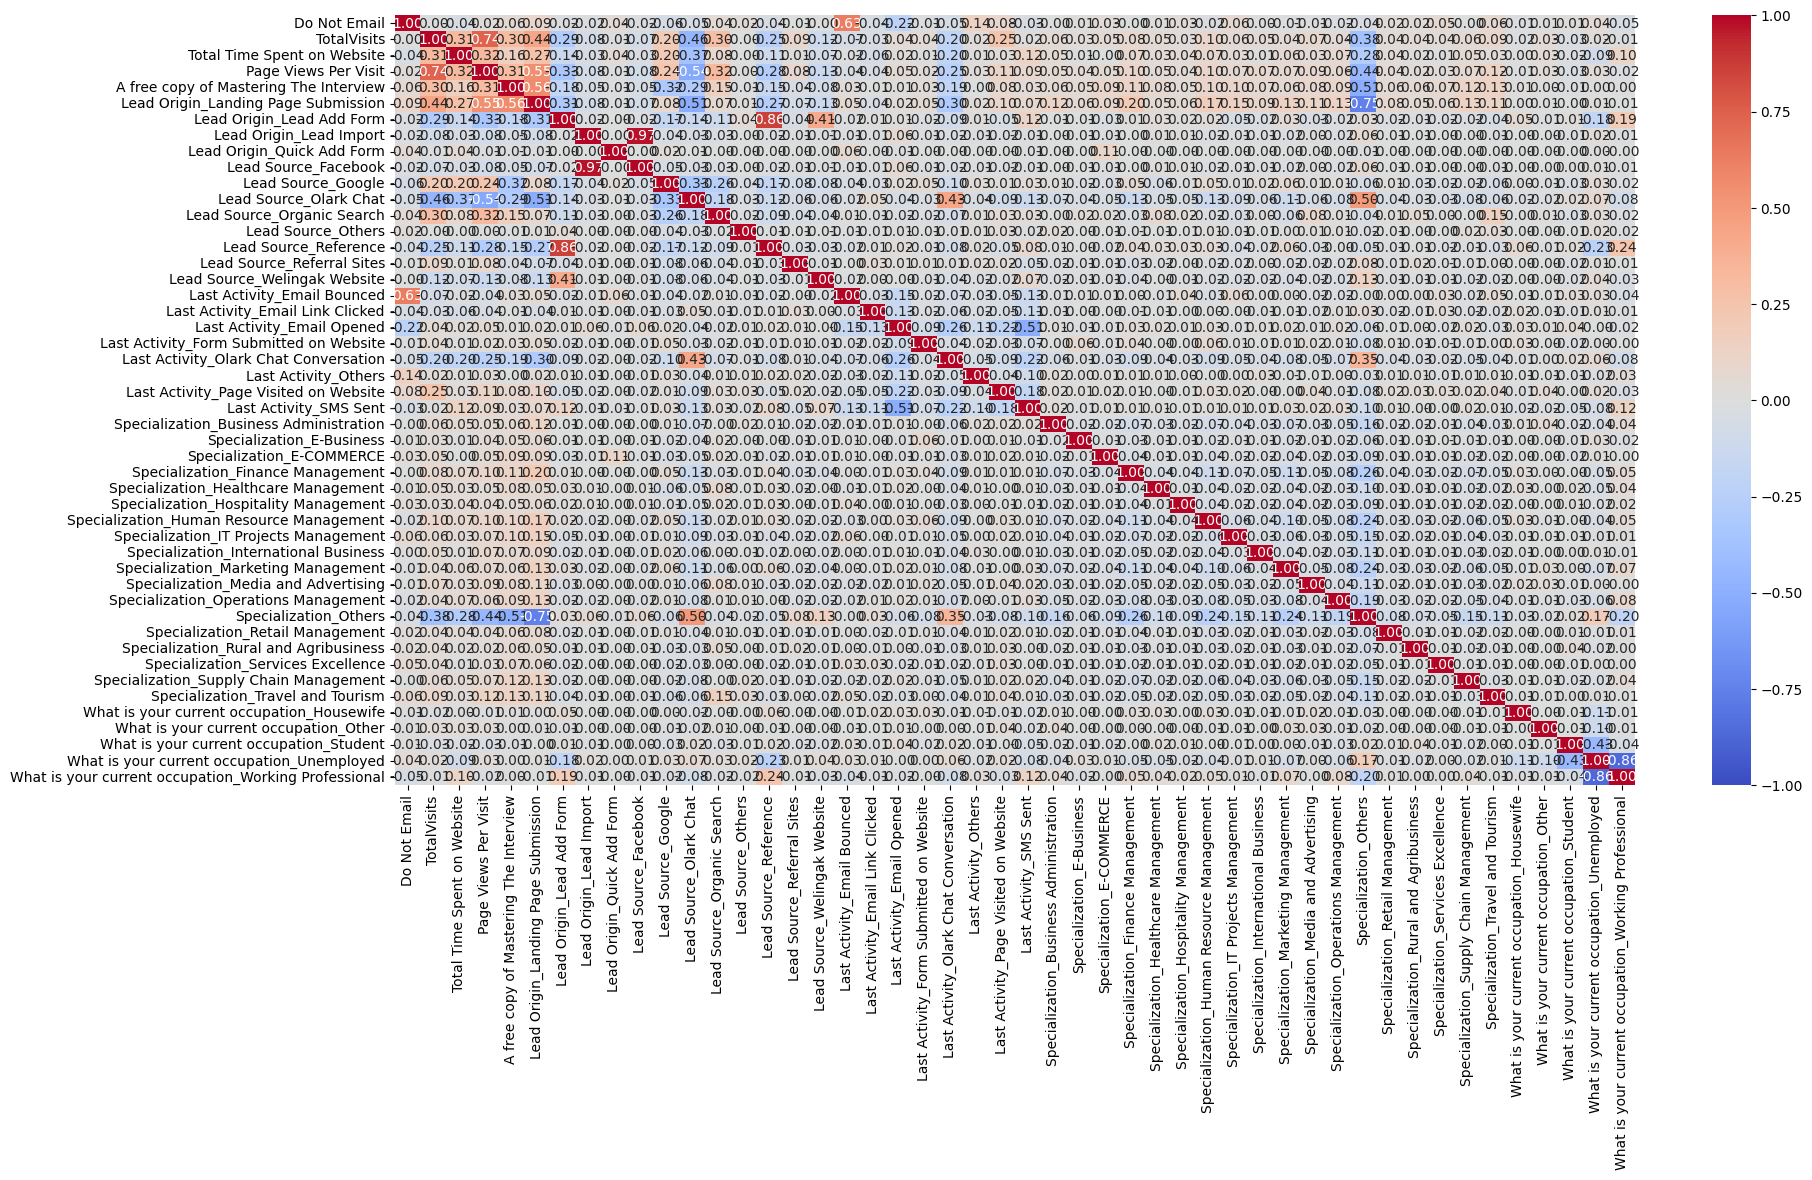

In [240]:
# Creating heatmap

plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True, cmap= 'coolwarm', fmt= '.2f', vmin= -1, vmax= 1)
plt.show()

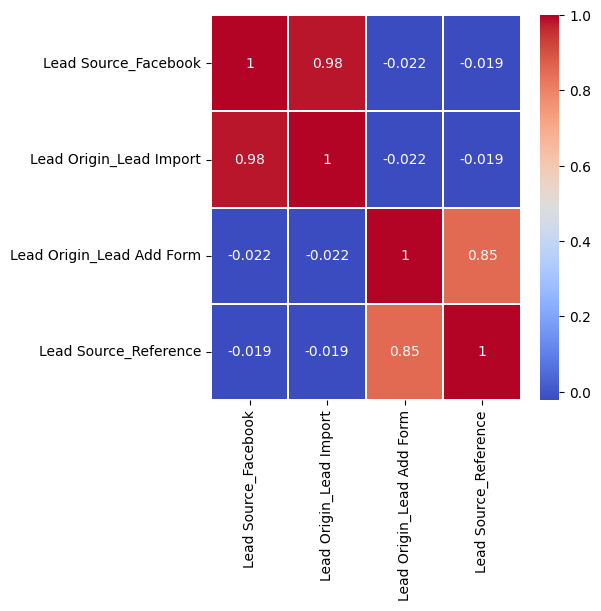

In [241]:
# Focusing on variables that might be highly correlated with each other
plt.figure(figsize=(5,5))

# Creating a heatmap for suspected variables
sns.heatmap(df[["Lead Source_Facebook", "Lead Origin_Lead Import",
                "Lead Origin_Lead Add Form", "Lead Source_Reference"]]
                .corr(), linewidths=0.01, cmap="coolwarm", annot=True)

plt.show()

The predictor variables mentioned above exhibit a very high correlation, with correlation coefficients near the diagonal (0.98 and 0.85). To avoid redundancy and multicollinearity, it's recommended to drop one variable from each highly correlated pair, as retaining both won't add significant value to the model. Therefore, we can proceed by dropping 'Lead Origin_Lead Import' and 'Lead Origin_Lead Add Form' to maintain a more efficient model.

### Model Building

In [242]:
# Lets use RFE to reduce variables
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [243]:
# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [244]:
# Check the top 15 features chosen by RFE
top=pd.DataFrame()
top['features']=X_train.columns
top['Feature Chosen'] = rfe.support_
top['Ranking']=rfe.ranking_
top.sort_values(by='Ranking')

,features,Feature Chosen,Ranking
0,Do Not Email,True,1
43,What is your current occupation_Housewife,True,1
37,Specialization_Others,True,1
24,Last Activity_SMS Sent,True,1
22,Last Activity_Others,True,1
21,Last Activity_Olark Chat Conversation,True,1
19,Last Activity_Email Opened,True,1
16,Lead Source_Welingak Website,True,1
11,Lead Source_Olark Chat,True,1
47,What is your current occupation_Working Profes...,True,1


In [245]:
# columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       '

In [246]:
# Function to calculate VIF for each feature
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns  # Get feature names
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]  # Calculate VIF
    X['VIF'] = round(X['VIF'], 2)  # Round the VIF values to 2 decimal places
    X = X.sort_values(by='VIF', ascending=False)  # Sort features by their VIF values in descending order
    X = X.reset_index(drop=True)  # Reset index
    return X  # Return the resulting dataframe


### First model

In [247]:
# Building model using statsmodels, for the detailed statistics

# columns selected by RFE to be used for this model
rfe_col=X_train.columns[rfe.support_]

# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()

logm1.params

,0
const,-0.575799
Do Not Email,-0.316412
TotalVisits,0.363696
Total Time Spent on Website,1.058494
Page Views Per Visit,-0.281637
Lead Origin_Landing Page Submission,-0.539268
Lead Origin_Lead Add Form,0.834466
Lead Source_Olark Chat,0.425699
Lead Source_Welingak Website,0.305745
Last Activity_Email Opened,0.406932


In [248]:
#Let's see the summary of our logistic regression model
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2666.9
Date:                Sun, 20 Oct 2024   Deviance:                       5333.7
Time:                        12:03:49   Pearson chi2:                 8.15e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3963
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

"Current_occupation_Housewife" column will be removed from model due to high p-value of 0.999, which is above the accepted threshold of 0.05 for statistical significance.

In [249]:
# Dropping 'Current_occupation_Housewife' column
rfe_col=rfe_col.drop("What is your current occupation_Housewife")

Second model

In [250]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()

logm2.params

,0
const,-0.602628
Do Not Email,-0.318043
TotalVisits,0.359776
Total Time Spent on Website,1.057401
Page Views Per Visit,-0.282177
Lead Origin_Landing Page Submission,-0.536605
Lead Origin_Lead Add Form,0.837655
Lead Source_Olark Chat,0.423383
Lead Source_Welingak Website,0.303745
Last Activity_Email Opened,0.405654


In [251]:
#Let's see the summary of our logistic regression model
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2674.6
Date:                Sun, 20 Oct 2024   Deviance:                       5349.2
Time:                        12:03:49   Pearson chi2:                 8.18e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3949
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

# Third Model

In [252]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()

logm3.params

,0
const,-0.602628
Do Not Email,-0.318043
TotalVisits,0.359776
Total Time Spent on Website,1.057401
Page Views Per Visit,-0.282177
Lead Origin_Landing Page Submission,-0.536605
Lead Origin_Lead Add Form,0.837655
Lead Source_Olark Chat,0.423383
Lead Source_Welingak Website,0.303745
Last Activity_Email Opened,0.405654


In [253]:
#Let's see the summary of our logistic regression model
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2674.6
Date:                Sun, 20 Oct 2024   Deviance:                       5349.2
Time:                        12:03:50   Pearson chi2:                 8.18e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3949
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Model 2 is stable and has significant p-values within the threshold (p-values < 0.05), so we will use it for further analysis.

In [254]:
# Now checking VIFs for all variables in the Model 4
get_vif(X_train_rfe)

,Features,VIF
0,Lead Origin_Landing Page Submission,3.50
1,Specialization_Others,3.00
2,Page Views Per Visit,2.90
3,Lead Source_Olark Chat,2.34
4,TotalVisits,2.32
5,Last Activity_Email Opened,2.09
6,Lead Origin_Lead Add Form,2.08
7,Last Activity_SMS Sent,1.98
8,Last Activity_Olark Chat Conversation,1.72
9,Total Time Spent on Website,1.27


No variable needs to be dropped as they all have good VIF values less than 5.

> p-values for all variables is less than 0.05 <br>
>This model looks acceptable as everything is under control (p-values & VIFs).<br>
>So we will final our Model 2 for Model Evaluation.

# Model Evaluation

In [255]:
# Getting the predicted values on the train set
y_train_pred = logm2.predict(X_train_sm2)           # giving prob. of getting 1

y_train_pred[:10]

,0
1871,0.454222
6795,0.095858
3516,0.292988
8105,0.748936
3934,0.211872
4844,0.990250
3297,0.135380
8071,0.996919
987,0.157199
7423,0.876563


In [256]:
# for array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.45422244, 0.0958576 , 0.2929878 , 0.74893554, 0.21187203,
       0.99025007, 0.13537975, 0.99691917, 0.15719875, 0.87656254])

In [257]:

# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

# y_train.values actual Converted values from df_leads dataset
# y_train_pred probability of Converted values predicted by model

,Converted,Converted_Prob,Prospect ID
0,0,0.454222,1871
1,0,0.095858,6795
2,0,0.292988,3516
3,0,0.748936,8105
4,0,0.211872,3934


In [258]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.454222,1871,0
1,0,0.095858,6795,0
2,0,0.292988,3516,0
3,0,0.748936,8105,1
4,0,0.211872,3934,0


In [259]:
# Confusion matrix  (Actual / predicted)

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3577  425]
 [ 801 1665]]


Above is the confusion matrix

## Accuracy

In [260]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.8104514533085961


## Other metrics for evaluation

In [261]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

# Calculate false postive rate
print("false postive rate :", FP/ float(TN+FP))

# positive predictive value
print ("positive predictive value :", TP / float(TP+FP))

# Negative predictive value
print ("Negative predictive value :", TN / float(TN+ FN))

Sensitivity : 0.6751824817518248
Specificity : 0.8938030984507747
false postive rate : 0.10619690154922538
positive predictive value : 0.7966507177033493
Negative predictive value : 0.8170397441754226


## Plotting ROC-Curve

In [262]:
# Creating a function to plot ROC curve

def roc_plot(actual, probs):
    fpr, tpr, thresholds= roc_curve(actual, probs, drop_intermediate = False )
    auc_score= roc_auc_score(actual, probs)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

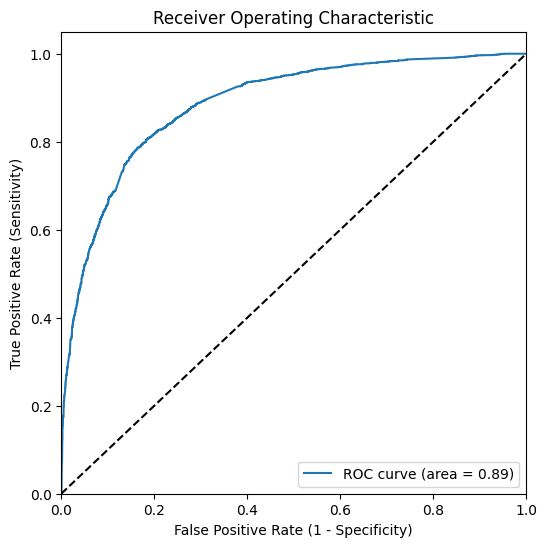

In [263]:
# Ploting ROC curve

fpr, tpr, thresholds= roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False  )
roc_plot(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

Area under ROC curve is 0.88 out of 1 which indicates a good predictive model

## Finding optimal cutoff


In [264]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.454222,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.095858,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.292988,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.748936,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.211872,3934,0,1,1,1,0,0,0,0,0,0,0


In [265]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.613791  0.972019  0.393053
0.2   0.2  0.731756  0.929440  0.609945
0.3   0.3  0.797310  0.837388  0.772614
0.4   0.4  0.817563  0.779400  0.841079
0.5   0.5  0.810451  0.675182  0.893803
0.6   0.6  0.800247  0.602190  0.922289
0.7   0.7  0.785714  0.521492  0.948526
0.8   0.8  0.759740  0.420925  0.968516
0.9   0.9  0.711194  0.258719  0.990005


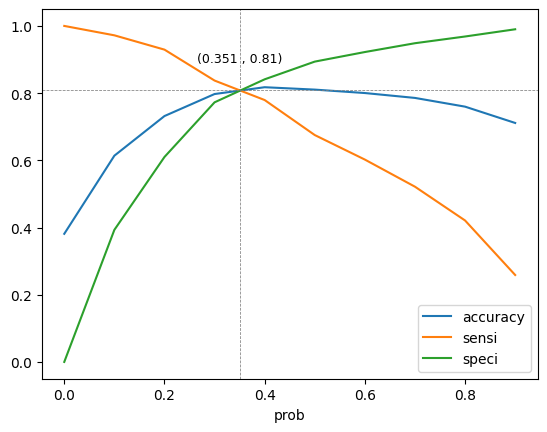

In [266]:
# Let's plot accuracy sensitivity and specificity for various probabilities.


# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()

0.351 is the approx. point where all the curves meet, so 0.351 seems to be our Optimal cutoff point for probability threshold .

Lets do mapping again using optimal cutoff point

In [267]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.351 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted
0,0,0.454222,1871,1
1,0,0.095858,6795,0
2,0,0.292988,3516,0
3,0,0.748936,8105,1
4,0,0.211872,3934,0


## calculating all metrics for train set using confusion matrix

In [268]:
def logreg_all_metrics(confusion_matrix):
    TN, FP, FN, TP = confusion_matrix.ravel()  # Unpack confusion matrix

    # Metrics calculations
    accuracy = (TN + TP) / (TN + TP + FN + FP)
    sensi = recall = TPR = TP / (TP + FN)  # True Positive Rate (Sensitivity/Recall)
    speci = TNR = TN / (TN + FP)           # True Negative Rate (Specificity)
    precision = TP / (TP + FP)
    FPR = FP / (FP + TN)                   # False Positive Rate
    FNR = FN / (FN + TP)                   # False Negative Rate

    # Print metrics
    print(f"True Negative (TN): {TN}")
    print(f"True Positive (TP): {TP}")
    print(f"False Negative (FN): {FN}")
    print(f"False Positive (FP): {FP}\n")

    print(f"Model Accuracy: {accuracy:.4f}")
    print(f"Model Sensitivity/Recall (TPR): {sensi:.4f}")
    print(f"Model Specificity (TNR): {speci:.4f}")
    print(f"Model Precision: {precision:.4f}")
    print(f"Model False Positive Rate (FPR): {FPR:.4f}")
    print(f"Model False Negative Rate (FNR): {FNR:.4f}")

In [269]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])

print("Confusion Matrix\n")
print(confusion_matrix)
print("\n" + "_" * 50 + "\n")

# Using the UDF to calculate all logistic regression metrics
logreg_all_metrics(confusion_matrix)

# Additional separator for clarity
print("\n" + "_" * 50 + "\n")


Confusion Matrix

[[3255  747]
 [ 475 1991]]

__________________________________________________

True Negative (TN): 3255
True Positive (TP): 1991
False Negative (FN): 475
False Positive (FP): 747

Model Accuracy: 0.8111
Model Sensitivity/Recall (TPR): 0.8074
Model Specificity (TNR): 0.8133
Model Precision: 0.7272
Model False Positive Rate (FPR): 0.1867
Model False Negative Rate (FNR): 0.1926

__________________________________________________



## Scaling Test Dataset

In [270]:
# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test = X_test[rfe_col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Others,What is your current occupation_Working Professional
4269,-0.291638,1.589714,0.964504,2.740929,-1.057954,-0.293817,-0.484585,-0.119457,-0.784979,-0.337384,-0.14545,1.526065,1.311898,-0.290075
2376,-0.291638,-1.064974,-0.885371,-1.184892,-1.057954,3.403477,-0.484585,-0.119457,-0.784979,-0.337384,-0.14545,1.526065,1.311898,-0.290075
7766,-0.291638,0.594206,-0.777416,1.432322,-1.057954,-0.293817,-0.484585,-0.119457,-0.784979,-0.337384,6.87522,-0.655280,-0.762254,3.447385
9199,-0.291638,-1.064974,-0.885371,-1.184892,-1.057954,-0.293817,2.063622,-0.119457,-0.784979,2.963979,-0.14545,-0.655280,1.311898,-0.290075
4359,-0.291638,-1.064974,-0.885371,-1.184892,-1.057954,3.403477,-0.484585,-0.119457,1.273920,-0.337384,-0.14545,-0.655280,-0.762254,-0.290075


Eval on Test dataset using final model

In [271]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 15)

In [272]:
# making prediction using model 4 (final model)
y_test_pred = logm2.predict(X_test_sm)

In [273]:
# top 10 columns
y_test_pred[:10]

,0
4269,0.646340
2376,0.869514
7766,0.880294
9199,0.057129
4359,0.862305
9186,0.467280
1631,0.373072
8963,0.149641
8007,0.069655
5324,0.284829


In [274]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [275]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.646340
1,1,2376,0.869514
2,1,7766,0.880294
3,0,9199,0.057129
4,1,4359,0.862305


In [276]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4269,1,0.646340
1,2376,1,0.869514
2,7766,1,0.880294
3,9199,0,0.057129
4,4359,1,0.862305


In [277]:
# taking sensitivity-specificity method at 0.345 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,4269,1,0.646340,1
1,2376,1,0.869514,1
2,7766,1,0.880294,1
3,9199,0,0.057129,0
4,4359,1,0.862305,1


### Test Set Model Eval

In [278]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("_"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("_"*50,"\n")

Confusion Matrix
[[1360  317]
 [ 216  879]] 

__________________________________________________ 

True Negative (TN): 1360
True Positive (TP): 879
False Negative (FN): 216
False Positive (FP): 317

Model Accuracy: 0.8077
Model Sensitivity/Recall (TPR): 0.8027
Model Specificity (TNR): 0.8110
Model Precision: 0.7349
Model False Positive Rate (FPR): 0.1890
Model False Negative Rate (FNR): 0.1973


__________________________________________________ 



These results are very close to train set, so out final model logm2 is performing with good consistency on both Train & Test set

* A higher score would mean that the lead is hot, i.e. is most likely to convert
* Whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [279]:
# add Lead Score

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4269,1,0.646340,1,65
1,2376,1,0.869514,1,87
2,7766,1,0.880294,1,88
3,9199,0,0.057129,0,6
4,4359,1,0.862305,1,86


* The customers with a higher lead score have a higher conversion chance
* The customers with a lower lead score have a lower conversion chance.

In [280]:
# features and their coefficicent from final model
parameters=logm2.params.sort_values(ascending=False)
parameters

,0
Total Time Spent on Website,1.057401
Last Activity_SMS Sent,0.929408
Lead Origin_Lead Add Form,0.837655
What is your current occupation_Working Professional,0.716468
Lead Source_Olark Chat,0.423383
Last Activity_Email Opened,0.405654
TotalVisits,0.359776
Lead Source_Welingak Website,0.303745
Last Activity_Others,0.205475
Last Activity_Olark Chat Conversation,-0.198325


A high positive coefficient suggests that the variable has a significant impact on increasing the likelihood of a lead converting to take up X-Education's course. This means that as the value of this variable increases, the probability of lead conversion rises.

# Conclusions
## Train Data Set


> **Accuracy** : 81.11% <br>
> **Sensitivity** : 80.74% <br>
>**Specifity** : 81.33%



## Test Data Set
> **Accuracy** : 80.77% <br>
> **Sensitivity** : 80.27% <br>
>**Specifity** : 81.10%

The evaluation metrics for both the train and test datasets are quite similar, indicating that the model performs consistently across various metrics.

In the train set, the model achieved an accuracy of 81.11%, a sensitivity of 80.74%, and a specificity of 81.33%. In the test set, the accuracy was 80.77%, sensitivity was 80.27%, and specificity was 81.10%, using a cut-off value of 0.345.

Sensitivity, in this case, represents the percentage of leads correctly identified by the model out of all potential leads likely to convert. The CEO of X Education set a target sensitivity of approximately 80%, which the model successfully met. Additionally, the model’s accuracy aligns well with the study's objectives.

### Recommendations
* Tailor messaging specifically for working professionals to boost engagement.
*Optimize communication methods based on how well leads respond to different channels.
* Increase budget for advertising on Welingak Website to enhance visibility.
* Offer incentives or discounts for referrals that convert, encouraging more people to refer others.
* Aggressively target working professionals, as they have a higher conversion rate and are more likely to afford premium fees.
* Focus marketing efforts on features with positive coefficients to better target potential customers.
* Create strategies to attract high-quality leads from the best-performing lead sources.
* Analyze specializations with negative coefficients to identify areas where offerings may need adjustment.
* Review the landing page submission process to find potential improvements for better lead conversions.
